## RS Oph Spectral Index Plot

In [1]:
#imports imports imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models

In [2]:
#All of the data

In [3]:
data = (

[59439.04,	2.6,	4.71,	0.14],
[59439.04,	3.4,	5.328,	0.093],
[59439.04,	5.1,	10.012,	0.058],
[59439.04,	7,	15.607,	0.057],
[59439.04,	13.7,	24.088,	0.055],
[59439.04,	16.5,	25.573,	0.059],
[59439.04,	31.1,	35.973,	0.14],
[59439.04,	34.9,	38.318,	0.16],
    
[59440.08,	2.6,	18.206,	0.11],
[59440.08,	3.4,	23.366,	0.1],
[59440.08,	5.1,	33.454,	0.059],
[59440.08,	7,	39.663,	0.055],
[59440.08,	13.7,	40.939,	0.062],
[59440.08,	16.5,	41.636,	0.063],
[59440.08,	31.1,	44.762,	0.14],
[59440.08,	34.9,	46.68,	0.15],
			
[59443.99,	2.6,	68.929,	0.37],
[59443.99,	3.4,	73.933,	0.11],
[59443.99,	5.1,	67.597,	0.087],
[59443.99,	7,	58.65,	0.068],
[59443.99,	13.7,	47.847,	0.066],
[59443.99,	16.5,	46.81,	0.063],
[59443.99,	31.1,	48.13,	0.14],
[59443.99,	34.9,	49.924,	0.16],
			
[59446.01,	2.6,	88.695,	0.21],
[59446.01,	3.4,	78.259,	0.11],
[59446.01,	5.1,	60.457,	0.065],
[59446.01,	7,	50.875,	0.057],
[59446.01,	13.7,	43.692,	0.054],
[59446.01,	16.5,	42.418,	0.055],
[59446.01,	31.1,	46.076,	0.12],
[59446.01,	34.9,	48.49,	0.14],
			
[59446.99,	2.6,	84.443,	0.34],
[59446.99,	3.4,	82.034,	0.13],
[59446.99,	5.1,	63.977,	0.083],
[59446.99,	7,	51.883,	0.062],
[59446.99,	13.7,	41.854,	0.056],
[59446.99,	16.5,	40.83,	0.056],
[59446.99,	31.1,	43.653,	0.12],
[59446.99,	34.9,	45.965,	0.13],
			
[59451.01,	2.6,	92.534,	0.24],
[59451.01,	3.4,	83.135,	0.19],
[59451.01,	5.1,	61.832,	0.074],
[59451.01,	7,	52.291,	0.059],
[59451.01,	13.7,	44.133,	0.054],
[59451.01,	16.5,	42.894,	0.061],
[59451.01,	31.1,	47.067,	0.12],
[59451.01,	34.9,	48.103,	0.13],
			
[59461.01,	2.6,	94.467,	0.22],
[59461.01,	3.4,	85.812,	0.17],
[59461.01,	5.1,	65.115,	0.074],
[59461.01,	7,	57.617,	0.064],
[59461.01,	13.7,	54.102,	0.06],
[59461.01,	16.5,	54.536,	0.065],
[59461.01,	31.1,	70.776,	0.15],
[59461.01,	34.9,	77.042,	0.16],
			
[59463.02,	2.6,	88.638,	0.2],
[59463.02,	3.4,	80.579,	0.17],
[59463.02,	5.1,	60.766,	0.069],
[59463.02,	7,	56.003,	0.062],
[59463.02,	13.7,	51.457,	0.068],
[59463.02,	16.5,	54.259,	0.074],
[59463.02,	31.1,	75.224,	0.17],
[59463.02,	34.9,	82.831,	0.18],
			
[59466.04,	2.6,	58.862,	0.17],
[59466.04,	3.4,	58.434,	0.13],
[59466.04,	5.1,	54.499,	0.067],
[59466.04,	7,	54.364,	0.068],
			
[59467.99,	2.6,	81.96,	0.23],
[59467.99,	3.4,	75.044,	0.15],
[59467.99,	5.1,	60.253,	0.061],
[59467.99,	7,	55.839,	0.055],
[59467.99,	13.7,	55.46,	0.057],
[59467.99,	16.5,	57.657,	0.059],
[59467.99,	31.1,	85.302,	0.13],
[59467.99,	34.9,	94.908,	0.14],
			
[59470.01,	2.6,	74.216,	0.24],
[59470.01,	3.4,	67.992,	0.14],
[59470.01,	5.1,	56.608,	0.058],
[59470.01,	7,	54.465,	0.056],
[59470.01,	13.7,	56.891,	0.061],
[59470.01,	16.5,	60.279,	0.063],
[59470.01,	31.1,	92.384,	0.14],
[59470.01,	34.9,	103.52,	0.15],
			
[59487.96,	2.6,	65.358,	0.18],
[59487.96,	3.4,	60.804,	0.13],
[59487.96,	5.1,	49.879,	0.061],
[59487.96,	7,	46.096,	0.058],
[59487.96,	13.7,	51.336,	0.074],
[59487.96,	16.5,	55.64,	0.083],
[59487.96,	31.1,	92.061,	0.14],
[59487.96,	34.9,	103.31,	0.16],
			
[59510.94,	2.6,	27.414,	0.13],
[59510.94,	3.4,	30.985,	0.086],
[59510.94,	5.1,	36.454,	0.052],
[59510.94,	7,	38.595,	0.05],		
			
[59511.92,	2.6,	36.139,	0.13],
[59511.92,	3.4,	36.456,	0.11],
[59511.92,	5.1,	36.228,	0.053],
[59511.92,	7,	38.215,	0.053],
[59511.92,	13.7,	45.791,	0.053],
[59511.92,	16.5,	50.332,	0.052],
[59511.92,	31.1,	79.492,	0.12],
[59511.92,	34.9,	88.439,	0.13],
			
[59523.82,	2.6,	32.964,	0.13],
[59523.82,	3.4,	32.519,	0.092],
[59523.82,	5.1,	31.849,	0.053],
[59523.82,	7,	32.08,	0.049],
[59523.82,	13.7,	38.122,	0.049],
[59523.82,	16.5,	41.511,	0.05],
[59523.82,	31.1,	66.05,	0.11],
[59523.82,	34.9,	72.993,	0.12],
			
[59574.76,	2.6,	17.902,	0.2],
[59574.76,	3.4,	17.739,	0.18],
[59574.76,	5.1,	17.481,	0.064],
[59574.76,	7,	19.527,	0.06],
[59574.76,	13.7,	25.248,	0.067],
[59574.76,	16.5,	26.955,	0.061],
[59574.76,	31.1,	42.236,	0.34],
[59574.76,	34.9,	47.137,	0.35],
			
[59588.66,	2.6,	24.59,	0.16],
[59588.66,	3.4,	22.702,	0.14],
[59588.66,	5.1,	18.554,	0.06],
[59588.66,	7,	18.619,	0.051],
[59588.66,	13.7,	21.6,	0.051],
[59588.66,	16.5,	22.164,	0.053],
[59588.66,	31.1,	26.488,	0.1],
[59588.66,	34.9,	27.475,	0.11],
			
[59590.61,	2.6,	24.388,	0.21],
[59590.61,	3.4,	22.617,	0.11],
[59590.61,	5.1,	19.794,	0.062],
[59590.61,	7,	19.169,	0.052],
[59590.61,	13.7,	21.908,	0.051],
[59590.61,	16.5,	22.994,	0.047],
[59590.61,	31.1,	28.341,	0.11],
[59590.61,	34.9,	29.746,	0.12],
			
[59595.61,	2.6,	23.163,	0.16],
[59595.61,	3.4,	20.742,	0.13],
[59595.61,	5.1,	17.488,	0.056],
[59595.61,	7,	17.871,	0.057],
[59595.61,	13.7,	20.702,	0.05],
[59595.61,	16.5,	21.855,	0.048],
[59595.61,	31.1,	27.116,	0.11],
[59595.61,	34.9,	28.356,	0.11],
			
[60034.47,	2.6,	3.295,	0.17],
[60034.47,	3.4,	3.342,	0.12],
[60034.47,	5.1,	2.765,	0.052],
[60034.47,	7,	2.347,	0.049],
[60034.47,	13.7,	1.672,	0.05],
[60034.47,	16.5,	1.526,	0.051],
[60034.47,	31.1,	0.87,	0.1],
[60034.47,	34.9,	0.862,	0.11],
			
[60049.34,	2.6,	2.777,	0.17],
[60049.34,	3.4,	2.82,	0.078],
[60049.34,	5.1,	2.684,	0.053],
[60049.34,	7,	2.373,	0.046],
[60049.34,	13.7,	1.67,	0.048],
[60049.34,	16.5,	1.541,	0.048],
[60049.34,	31.1,	1.077,	0.11],
[60049.34,	34.9,	1.113,	0.12],
			
[60131.12,	2.6,	1.808,	0.017],
[60131.12,	3.4,	1.999,	0.014],
[60131.12,	5.1,	2.163,	0.016],
[60131.12,	7,	2.336,	0.018],
[60131.12,	13.7,	1.933,	0.02],
[60131.12,	16.5,	1.923,	0.022],
[60131.12,	31.1,	1.336,	0.066],
[60131.12,	34.9,	1.306,	0.079],
)

df =  pd.DataFrame(data, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

In [4]:
E1 = ([59439.04,	2.6,	4.71,	0.14],
[59439.04,	3.4,	5.328,	0.093],
[59439.04,	5.1,	10.012,	0.058],
[59439.04,	7,	15.607,	0.057],
[59439.04,	13.7,	24.088,	0.055],
[59439.04,	16.5,	25.573,	0.059],
[59439.04,	31.1,	35.973,	0.14],
[59439.04,	34.9,	38.318,	0.16],)

E2 = ( 
[59440.08,	2.6,	18.206,	0.11],
[59440.08,	3.4,	23.366,	0.1],
[59440.08,	5.1,	33.454,	0.059],
[59440.08,	7,	39.663,	0.055],
[59440.08,	13.7,	40.939,	0.062],
[59440.08,	16.5,	41.636,	0.063],
[59440.08,	31.1,	44.762,	0.14],
[59440.08,	34.9,	46.68,	0.15],)

E3 = (
    [59443.99,	2.6,	68.929,	0.37],
[59443.99,	3.4,	73.933,	0.11],
[59443.99,	5.1,	67.597,	0.087],
[59443.99,	7,	58.65,	0.068],
[59443.99,	13.7,	47.847,	0.066],
[59443.99,	16.5,	46.81,	0.063],
[59443.99,	31.1,	48.13,	0.14],
[59443.99,	34.9,	49.924,	0.16],
)

E4 = ([59446.01,	2.6,	88.695,	0.21],
[59446.01,	3.4,	78.259,	0.11],
[59446.01,	5.1,	60.457,	0.065],
[59446.01,	7,	50.875,	0.057],
[59446.01,	13.7,	43.692,	0.054],
[59446.01,	16.5,	42.418,	0.055],
[59446.01,	31.1,	46.076,	0.12],
[59446.01,	34.9,	48.49,	0.14],)

E5 = ([59446.99,	2.6,	84.443,	0.34],
[59446.99,	3.4,	82.034,	0.13],
[59446.99,	5.1,	63.977,	0.083],
[59446.99,	7,	51.883,	0.062],
[59446.99,	13.7,	41.854,	0.056],
[59446.99,	16.5,	40.83,	0.056],
[59446.99,	31.1,	43.653,	0.12],
[59446.99,	34.9,	45.965,	0.13],)

E6 = (			
[59451.01,	2.6,	92.534,	0.24],
[59451.01,	3.4,	83.135,	0.19],
[59451.01,	5.1,	61.832,	0.074],
[59451.01,	7,	52.291,	0.059],
[59451.01,	13.7,	44.133,	0.054],
[59451.01,	16.5,	42.894,	0.061],
[59451.01,	31.1,	47.067,	0.12],
[59451.01,	34.9,	48.103,	0.13],
			)

E7 = ([59461.01,	2.6,	94.467,	0.22],
[59461.01,	3.4,	85.812,	0.17],
[59461.01,	5.1,	65.115,	0.074],
[59461.01,	7,	57.617,	0.064],
[59461.01,	13.7,	54.102,	0.06],
[59461.01,	16.5,	54.536,	0.065],
[59461.01,	31.1,	70.776,	0.15],
[59461.01,	34.9,	77.042,	0.16],)

E8 = ([59463.02,	2.6,	88.638,	0.2],
[59463.02,	3.4,	80.579,	0.17],
[59463.02,	5.1,	60.766,	0.069],
[59463.02,	7,	56.003,	0.062],
[59463.02,	13.7,	51.457,	0.068],
[59463.02,	16.5,	54.259,	0.074],
[59463.02,	31.1,	75.224,	0.17],
[59463.02,	34.9,	82.831,	0.18],)

E9 = ([59466.04,	2.6,	58.862,	0.17],
[59466.04,	3.4,	58.434,	0.13],
[59466.04,	5.1,	54.499,	0.067],
[59466.04,	7,	54.364,	0.068],)

E10 = ([59467.99,	2.6,	81.96,	0.23],
[59467.99,	3.4,	75.044,	0.15],
[59467.99,	5.1,	60.253,	0.061],
[59467.99,	7,	55.839,	0.055],
[59467.99,	13.7,	55.46,	0.057],
[59467.99,	16.5,	57.657,	0.059],
[59467.99,	31.1,	85.302,	0.13],
[59467.99,	34.9,	94.908,	0.14],)

E11 = ([59470.01,	2.6,	74.216,	0.24],
[59470.01,	3.4,	67.992,	0.14],
[59470.01,	5.1,	56.608,	0.058],
[59470.01,	7,	54.465,	0.056],
[59470.01,	13.7,	56.891,	0.061],
[59470.01,	16.5,	60.279,	0.063],
[59470.01,	31.1,	92.384,	0.14],
[59470.01,	34.9,	103.52,	0.15],)

E12 = ([59487.96,	2.6,	65.358,	0.18],
[59487.96,	3.4,	60.804,	0.13],
[59487.96,	5.1,	49.879,	0.061],
[59487.96,	7,	46.096,	0.058],
[59487.96,	13.7,	51.336,	0.074],
[59487.96,	16.5,	55.64,	0.083],
[59487.96,	31.1,	92.061,	0.14],
[59487.96,	34.9,	103.31,	0.16],)

E13 = (			
[59510.94,	2.6,	27.414,	0.13],
[59510.94,	3.4,	30.985,	0.086],
[59510.94,	5.1,	36.454,	0.052],
[59510.94,	7,	38.595,	0.05],	)

E14 = (			
[59511.92,	2.6,	36.139,	0.13],
[59511.92,	3.4,	36.456,	0.11],
[59511.92,	5.1,	36.228,	0.053],
[59511.92,	7,	38.215,	0.053],
[59511.92,	13.7,	45.791,	0.053],
[59511.92,	16.5,	50.332,	0.052],
[59511.92,	31.1,	79.492,	0.12],
[59511.92,	34.9,	88.439,	0.13],)

E15 = (			
[59523.82,	2.6,	32.964,	0.13],
[59523.82,	3.4,	32.519,	0.092],
[59523.82,	5.1,	31.849,	0.053],
[59523.82,	7,	32.08,	0.049],
[59523.82,	13.7,	38.122,	0.049],
[59523.82,	16.5,	41.511,	0.05],
[59523.82,	31.1,	66.05,	0.11],
[59523.82,	34.9,	72.993,	0.12],)

E16 = (			
[59574.76,	2.6,	17.902,	0.2],
[59574.76,	3.4,	17.739,	0.18],
[59574.76,	5.1,	17.481,	0.064],
[59574.76,	7,	19.527,	0.06],
[59574.76,	13.7,	25.248,	0.067],
[59574.76,	16.5,	26.955,	0.061],
[59574.76,	31.1,	42.236,	0.34],
[59574.76,	34.9,	47.137,	0.35],)

E17 = (			
[59588.66,	2.6,	24.59,	0.16],
[59588.66,	3.4,	22.702,	0.14],
[59588.66,	5.1,	18.554,	0.06],
[59588.66,	7,	18.619,	0.051],
[59588.66,	13.7,	21.6,	0.051],
[59588.66,	16.5,	22.164,	0.053],
[59588.66,	31.1,	26.488,	0.1],
[59588.66,	34.9,	27.475,	0.11],)

E18 = (			
[59590.61,	2.6,	24.388,	0.21],
[59590.61,	3.4,	22.617,	0.11],
[59590.61,	5.1,	19.794,	0.062],
[59590.61,	7,	19.169,	0.052],
[59590.61,	13.7,	21.908,	0.051],
[59590.61,	16.5,	22.994,	0.047],
[59590.61,	31.1,	28.341,	0.11],
[59590.61,	34.9,	29.746,	0.12],)

E19 = (			
[59595.61,	2.6,	23.163,	0.16],
[59595.61,	3.4,	20.742,	0.13],
[59595.61,	5.1,	17.488,	0.056],
[59595.61,	7,	17.871,	0.057],
[59595.61,	13.7,	20.702,	0.05],
[59595.61,	16.5,	21.855,	0.048],
[59595.61,	31.1,	27.116,	0.11],
[59595.61,	34.9,	28.356,	0.11],)

E20 = (			
[60034.47,	2.6,	3.295,	0.17],
[60034.47,	3.4,	3.342,	0.12],
[60034.47,	5.1,	2.765,	0.052],
[60034.47,	7,	2.347,	0.049],
[60034.47,	13.7,	1.672,	0.05],
[60034.47,	16.5,	1.526,	0.051],
[60034.47,	31.1,	0.87,	0.1],
[60034.47,	34.9,	0.862,	0.11],)

E21 = ([60049.34,	2.6,	2.777,	0.17],
[60049.34,	3.4,	2.82,	0.078],
[60049.34,	5.1,	2.684,	0.053],
[60049.34,	7,	2.373,	0.046],
[60049.34,	13.7,	1.67,	0.048],
[60049.34,	16.5,	1.541,	0.048],
[60049.34,	31.1,	1.077,	0.11],
[60049.34,	34.9,	1.113,	0.12],)

E22 = (			
[60131.12,	2.6,	1.808,	0.017],
[60131.12,	3.4,	1.999,	0.014],
[60131.12,	5.1,	2.163,	0.016],
[60131.12,	7,	2.336,	0.018],
[60131.12,	13.7,	1.933,	0.02],
[60131.12,	16.5,	1.923,	0.022],
[60131.12,	31.1,	1.336,	0.066],
[60131.12,	34.9,	1.306,	0.079],)

In [5]:
df1 =  pd.DataFrame(E1, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df2 =  pd.DataFrame(E2, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df3 =  pd.DataFrame(E3, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df4 =  pd.DataFrame(E4, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df5 =  pd.DataFrame(E5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df6 =  pd.DataFrame(E6, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df7 =  pd.DataFrame(E7, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df8 =  pd.DataFrame(E8, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df9 =  pd.DataFrame(E9, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df10 =  pd.DataFrame(E10, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df11 =  pd.DataFrame(E11, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df12 =  pd.DataFrame(E12, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df13 =  pd.DataFrame(E13, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df14 =  pd.DataFrame(E14, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df15 =  pd.DataFrame(E15, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df16 =  pd.DataFrame(E16, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df17 =  pd.DataFrame(E17, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df18 =  pd.DataFrame(E18, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df19 =  pd.DataFrame(E19, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df20 =  pd.DataFrame(E20, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df21 =  pd.DataFrame(E21, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df22 =  pd.DataFrame(E22, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

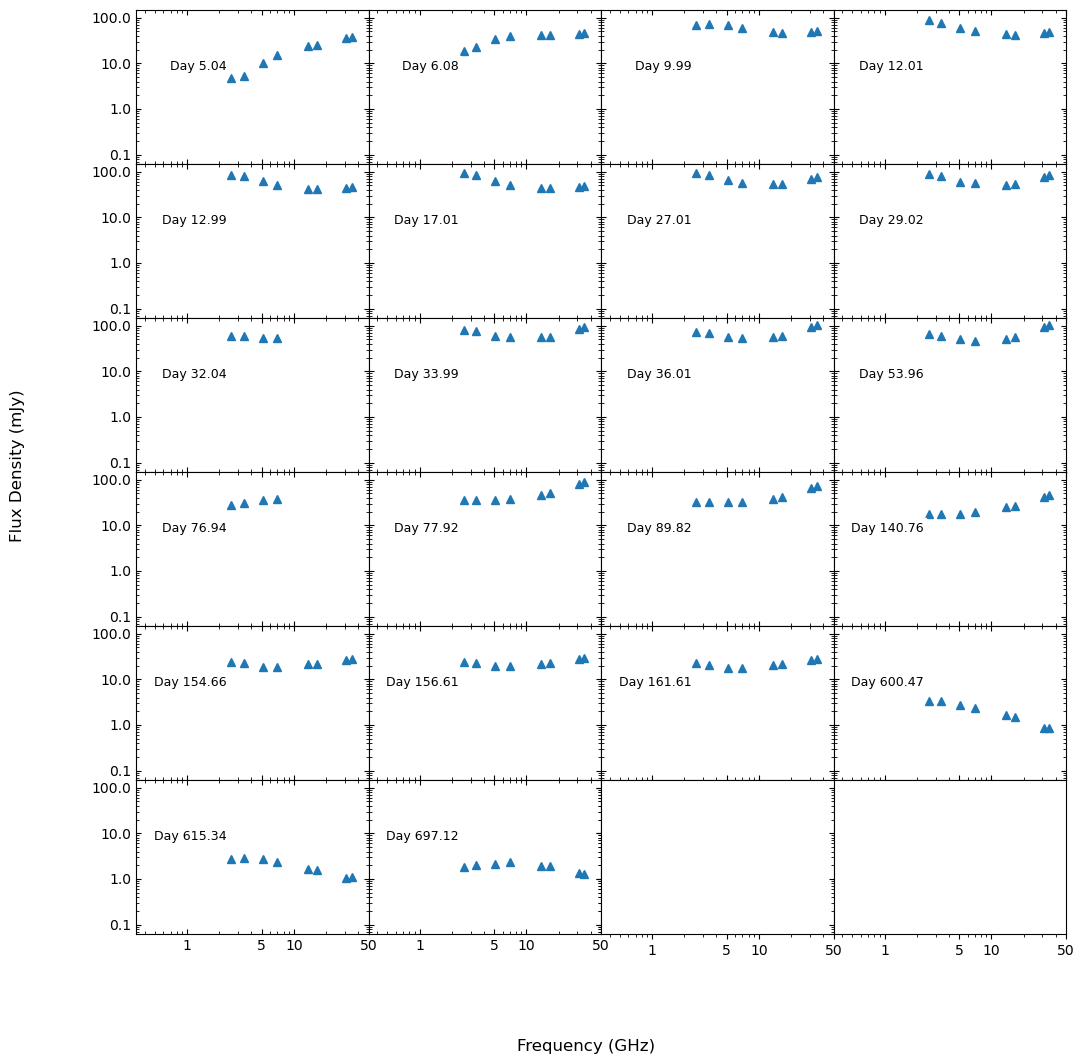

In [6]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22]

annotations = ['Day 5.04', 'Day 6.08', 'Day 9.99','Day 12.01', 'Day 12.99', 'Day 17.01','Day 27.01', 'Day 29.02', 'Day 32.04','Day 33.99',
               'Day 36.01', 'Day 53.96','Day 76.94', 'Day 77.92', 'Day 89.82','Day 140.76', 'Day 154.66', 
               'Day 156.61','Day 161.61', 'Day 600.47', 'Day 615.34', 'Day 697.12']


fig, ax = plt.subplots(6, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)


for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 4)
    mask = df["Flux Density (mJy)"] > 3 * df["Uncertainty (mJy)"] #don't show the non-detections
    if mask.any():
        ax[row,col].errorbar(df["Freq (GHz)"][mask], df["Flux Density (mJy)"][mask], yerr=df["Uncertainty (mJy)"][mask], fmt='^')
        ax[row,col].set_xscale('log')
        ax[row,col].set_yscale('log')
        ax[row,col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row,col].set_yticks([.1, 1,10, 100], labels=['0.1','1.0', '10.0', '100.0'])
        ax[row,col].annotate(label, xy=(65, 75), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row,col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();

# Now to find the alpha

In [7]:
def error(err, freq, flux):
    yerr = []
    for i in range(len(freq)):
        if freq[i] < 10:
            pl = np.sqrt(err[i]**2 + (flux[i]*0.05)**2)
            yerr.append(pl)
        else:
            pl =np.sqrt(err[i]**2 + (flux[i]*0.1)**2)
            yerr.append(pl)

    return(yerr)



## Day 5.04 (df1)

In [8]:
#(work for anything with 3+ points)
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold

x1 = df1['Freq (GHz)'][mask].values.tolist()
y1 = df1['Flux Density (mJy)'][mask].values.tolist()
yerr1 = df1['Uncertainty (mJy)'][mask].values.tolist()


In [9]:
yerr1 = error(yerr1, x1, y1)

In [10]:
PL1 =  PowerLaw1D(amplitude = y1[0], x_0= x1[0], alpha= .5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit1 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model1 = fit1(PL1, x1, y1)


#weight is 1/error^2
y_weight1 = 1/ (np.power(yerr1, 2))  

# fit the data using the uncertainties as weights
fit_model_weights1 = fit1(PL1, x1, y1, weights=y_weight1)

fit_model_weights1


<PowerLaw1D(amplitude=5.05728876, x_0=2.97513314, alpha=-1.07503188)>

In [11]:
fit1.fit_info

{'nfev': 15,
 'fvec': array([-4.46109608,  6.401531  , -3.87847045, -4.7682101 ,  0.34920347,
         0.9661251 ,  2.08883533,  2.24665497]),
 'fjac': array([[ 3.72035653e+01,  1.47427141e+01, -2.03620171e+01,
          2.01704964e-01,  4.37806397e-02,  4.74393449e-02,
          4.73427491e-02,  4.72197158e-02],
        [ 1.47427141e+01,  3.19014993e+01, -7.86634342e-15,
          5.28929152e-01,  2.09492424e-01,  2.55413972e-01,
          3.51545481e-01,  3.68164412e-01],
        [-2.03620171e+01,  1.44097407e-15, -1.64126080e-15,
          3.14677610e-01,  2.71324683e-01,  4.13272565e-01,
          5.01173625e-01,  5.28063885e-01]]),
 'ipvt': array([1, 2, 0], dtype=int32),
 'qtf': array([5.59886745e-04, 2.06142722e-06, 5.63466416e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.71231489e+29,  2.03180041e+29, -1.67683326e+13],
        [ 2.03180041e+29,  1.11203198

In [12]:
#taking fvec
fvec1 = np.array([-4.46109608,  6.401531  , -3.87847045, -4.7682101 ,  0.34920347,
         0.9661251 ,  2.08883533,  2.24665497])
var1 = np.var(fvec1)

#taking cov_x
cov_x1 = np.array([[ 3.71231489e+29,  2.03180041e+29, -1.67683326e+13],
        [ 2.03180041e+29,  1.11203198e+29, -9.17753641e+12],
        [-1.67683326e+13, -9.17753641e+12,  1.74001922e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag1 = stand(cov_x1*var1) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag1[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.1539634535615218


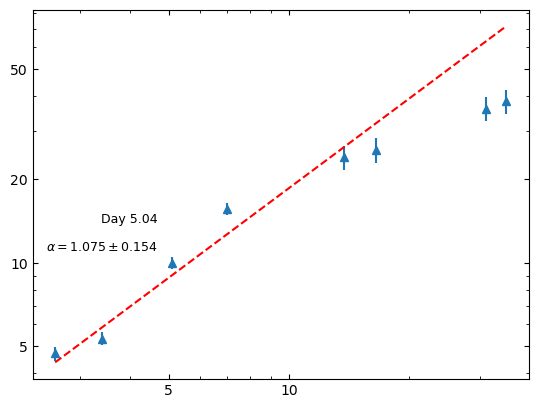

In [13]:
#plotting to check
fig,ax = plt.subplots()
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df1['Freq (GHz)'][mask], df1['Flux Density (mJy)'][mask], yerr=yerr1, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 5.04', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df1['Freq (GHz)'][mask], fit_model_weights1(df1['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 1.075 \\pm 0.154}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 6.08 (df2)

In [14]:
#(work for anything with 3+ points)
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold

x2 = df2['Freq (GHz)'][mask].values.tolist()
y2 = df2['Flux Density (mJy)'][mask].values.tolist()
yerr2 = df2['Uncertainty (mJy)'][mask].values.tolist()


In [15]:
yerr2 = error(yerr2, x2, y2)

In [16]:
PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= -3.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit2 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model2 = fit2(PL2, x2, y2)


#weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2, 2))  

# fit the data using the uncertainties as weights
fit_model_weights2 = fit2(PL2, x2, y2, weights=y_weight2)

fit_model_weights2


<PowerLaw1D(amplitude=424.21494489, x_0=843.125074, alpha=-0.53353308)>

In [17]:
fit2.fit_info

{'nfev': 39,
 'fvec': array([ 1.42686625, -0.70860911, -2.01842999, -1.71409143,  0.36740618,
         0.59833359,  1.40494398,  1.41598542]),
 'fjac': array([[-1.74901780e+02, -7.45644279e-02,  2.00164475e-02,
          2.29096813e-01,  6.61764054e-02,  6.74635823e-02,
          6.86162184e-02,  6.47483690e-02],
        [-7.45644279e-02, -6.91934735e-03,  1.85746417e-03,
          4.26976485e-01,  2.57479310e-01,  3.08615791e-01,
          5.13527679e-01,  5.26902034e-01],
        [ 2.00164475e-02,  1.85746417e-03,  9.71253940e-19,
         -5.58145572e-01, -1.67443672e-01, -3.34887343e-01,
         -2.23258229e-01, -6.69774687e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-2.02620021e-05, -2.38465345e-05,  1.67609501e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[7.63914998e+34, 2.84570400e+35, 6.17366810e+15],
        [2.84570400e+35, 1.06006968e+

In [18]:
#taking fvec
fvec2 = np.array([ 1.42686625, -0.70860911, -2.01842999, -1.71409143,  0.36740618,
         0.59833359,  1.40494398,  1.41598542])
var2 = np.var(fvec2)

#taking cov_x
cov_x2 = np.array([[7.63914998e+34, 2.84570400e+35, 6.17366810e+15],
        [2.84570400e+35, 1.06006968e+36, 2.29978886e+16],
        [6.17366810e+15, 2.29978886e+16, 4.32778321e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag2 = stand(cov_x2*var2) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag2[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.08686334692002702


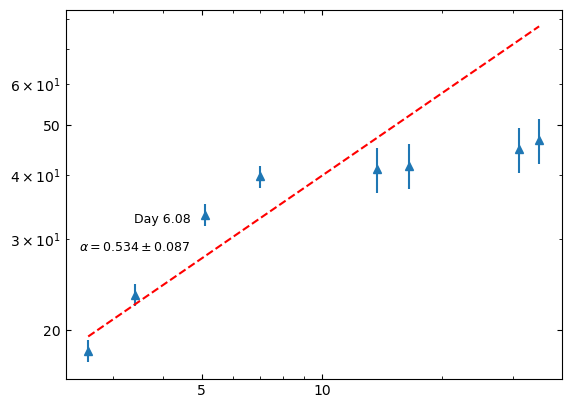

In [19]:
#plotting to check
fig,ax = plt.subplots()
mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Freq (GHz)'][mask], df2['Flux Density (mJy)'][mask], yerr=yerr2, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 6.08', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.534 \\pm 0.087}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## dAY 9.99 (df3)

In [20]:
#(work for anything with 3+ points)
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold

x3 = df3['Freq (GHz)'][mask].values.tolist()
y3 = df3['Flux Density (mJy)'][mask].values.tolist()
yerr3 = df3['Uncertainty (mJy)'][mask].values.tolist()


In [21]:
yerr3 = error(yerr3, x3, y3)

In [22]:
PL3 =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= -3.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit3 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model3 = fit3(PL3, x3, y3)


#weight is 1/error^2
y_weight3 = 1/ (np.power(yerr3, 2))  

# fit the data using the uncertainties as weights
fit_model_weights3 = fit3(PL3, x3, y3, weights=y_weight3)

fit_model_weights3


<PowerLaw1D(amplitude=24.31926686, x_0=929.9606829, alpha=0.18576418)>

In [23]:
fit3.fit_info

{'nfev': 64,
 'fvec': array([ 0.29665376, -0.36292261, -0.31771727,  0.19303604,  0.2354447 ,
         0.21082609, -0.10405179, -0.20741834]),
 'fjac': array([[-6.59390917e+01, -5.16854875e-01, -2.51004705e-03,
          5.19765396e-01,  1.48728835e-01,  1.43498089e-01,
          1.01622444e-01,  8.92966639e-02],
        [-5.16854875e-01,  6.26229446e-02,  3.04121224e-04,
         -4.74698358e-01, -3.45505656e-01, -4.01294192e-01,
         -4.87743409e-01, -4.68538844e-01],
        [-2.51004705e-03,  3.04121224e-04,  3.51387001e-19,
          5.39961295e-01,  3.47117975e-01,  2.69980647e-01,
          3.85686639e-01,  2.31411984e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-1.69484023e-06, -3.16574234e-06,  5.08635162e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.91009562e+32, -3.93316225e+34,  6.17319787e+14],
        [-3.93316225e+34,  8.09894

In [24]:
#taking fvec
fvec3 = np.array([ 0.29665376, -0.36292261, -0.31771727,  0.19303604,  0.2354447 ,
         0.21082609, -0.10405179, -0.20741834])
var3 = np.var(fvec3)

#taking cov_x
cov_x3 = np.array([[ 1.91009562e+32, -3.93316225e+34,  6.17319787e+14],
        [-3.93316225e+34,  8.09894812e+36, -1.27115044e+17],
        [ 6.17319787e+14, -1.27115044e+17,  1.78920414e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag3 = stand(cov_x3*var3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag3[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.03381473656287069


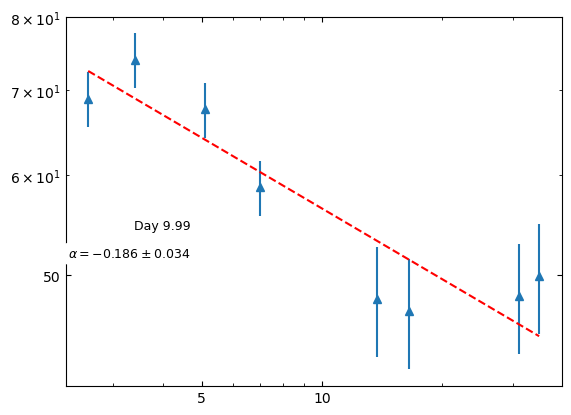

In [25]:
#plotting to check
fig,ax = plt.subplots()
mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq (GHz)'][mask], df3['Flux Density (mJy)'][mask], yerr=yerr3, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 9.99', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.186 \\pm 0.034}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 12.01 (df4)

In [26]:
#(work for anything with 3+ points)
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold

x4 = df4['Freq (GHz)'][mask].values.tolist()
y4 = df4['Flux Density (mJy)'][mask].values.tolist()
yerr4 = df4['Uncertainty (mJy)'][mask].values.tolist()


In [27]:
yerr4 = error(yerr4, x4, y4)

In [28]:
PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= -3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4)


#weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4, 2))  

# fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4)

fit_model_weights4


<PowerLaw1D(amplitude=9.51560247, x_0=945.90711151, alpha=0.35785324)>

In [29]:
fit4.fit_info

{'nfev': 54,
 'fvec': array([-0.51736691, -0.45337068,  0.1338218 ,  0.64832137, -0.0200807 ,
        -0.1054514 , -0.64858818, -0.74357469]),
 'fjac': array([[-6.66517825e+01, -1.36251311e+00, -4.90493709e-03,
          6.26183882e-01,  1.44118538e-01,  1.36776722e-01,
          7.78916718e-02,  6.51987236e-02],
        [-1.36251311e+00,  1.31740037e-01,  4.74253486e-04,
         -5.25951769e-01, -3.68699783e-01, -4.28793682e-01,
         -4.34046452e-01, -3.98780432e-01],
        [-4.90493709e-03,  4.74253486e-04, -4.67169195e-19,
          2.32079123e-01,  4.06138466e-01,  1.16039562e-01,
          0.00000000e+00, -2.90098904e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 4.40970831e-05,  3.68118865e-05, -6.29293005e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 5.93795779e+31, -1.64946975e+34, -2.18527739e+15],
        [-1.64946975e+34,  4.58196

In [30]:
#taking fvec
fvec4 = np.array([-0.51736691, -0.45337068,  0.1338218 ,  0.64832137, -0.0200807 ,
        -0.1054514 , -0.64858818, -0.74357469])
var4 = np.var(fvec4)

#taking cov_x
cov_x4 = np.array([[ 5.93795779e+31, -1.64946975e+34, -2.18527739e+15],
        [-1.64946975e+34,  4.58196328e+36,  6.07035126e+17],
        [-2.18527739e+15,  6.07035126e+17,  1.04725421e-01]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(cov_x4*var4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag4[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.1416434684188529


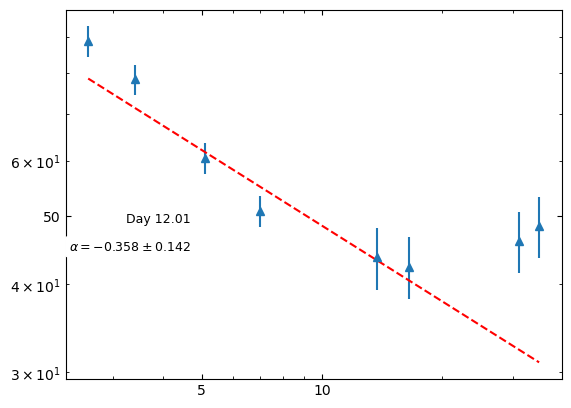

In [31]:
#plotting to check
fig,ax = plt.subplots()
mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq (GHz)'][mask], df4['Flux Density (mJy)'][mask], yerr=yerr4, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 12.01', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.358 \\pm 0.142}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 12.99 (df5)

In [32]:
#(work for anything with 3+ points)
mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold

x5 = df5['Freq (GHz)'][mask].values.tolist()
y5 = df5['Flux Density (mJy)'][mask].values.tolist()
yerr5 = df5['Uncertainty (mJy)'][mask].values.tolist()


In [34]:
yerr5 = error(yerr5, x5, y5)

In [38]:
PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= -3.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)


#weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5, 2))  

# fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5)

fit_model_weights5


<PowerLaw1D(amplitude=9.5278505, x_0=952.31750462, alpha=0.36146653)>

In [39]:
fit5.fit_info

{'nfev': 47,
 'fvec': array([-0.22048499, -0.53353698, -0.08660539,  0.65100842,  0.13050945,
         0.02644924, -0.56804446, -0.68500569]),
 'fjac': array([[-6.55464472e+01, -1.33806767e+00, -4.83904141e-03,
          6.26337770e-01,  1.63026167e-01,  1.53145428e-01,
          8.98415566e-02,  7.51019274e-02],
        [-1.33806767e+00,  1.42598903e-01,  5.15700374e-04,
         -4.91479213e-01, -3.81359567e-01, -4.38119747e-01,
         -4.54994702e-01, -4.17265439e-01],
        [-4.83904141e-03,  5.15700374e-04,  1.02606146e-18,
          7.39664774e-01,  3.69832387e-01,  3.16999189e-01,
          2.11332793e-01,  1.84916193e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 1.71561042e-05,  3.80196073e-05, -3.93215181e-02]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.24226934e+31, -3.43506142e+33,  3.87797894e+14],
        [-3.43506142e+33,  9.49846

In [40]:
#taking fvec
fvec5 = np.array([-0.22048499, -0.53353698, -0.08660539,  0.65100842,  0.13050945,
         0.02644924, -0.56804446, -0.68500569])
var5 = np.var(fvec5)

#taking cov_x
cov_x5 = np.array([[ 1.24226934e+31, -3.43506142e+33,  3.87797894e+14],
        [-3.43506142e+33,  9.49846104e+35, -1.07231945e+17],
        [ 3.87797894e+14, -1.07231945e+17,  3.28325424e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag5 = stand(cov_x5*var5) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag5[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.07491799920053203


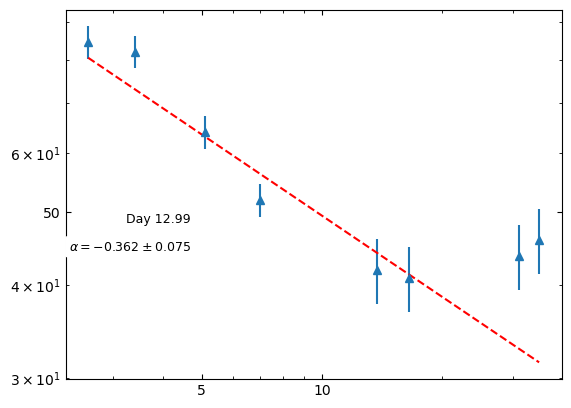

In [42]:
#plotting to check
fig,ax = plt.subplots()
mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq (GHz)'][mask], df5['Flux Density (mJy)'][mask], yerr=yerr5, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 12.99', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.362 \\pm 0.075}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 17.01 (df6)

In [43]:
#(work for anything with 3+ points)
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold

x6 = df6['Freq (GHz)'][mask].values.tolist()
y6 = df6['Flux Density (mJy)'][mask].values.tolist()
yerr6 = df6['Uncertainty (mJy)'][mask].values.tolist()


In [44]:
yerr6 = error(yerr6, x6, y6)

In [45]:
PL6 =  PowerLaw1D(amplitude = y6[0], x_0= x6[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit6 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model6 = fit6(PL6, x6, y6)


#weight is 1/error^2
y_weight6 = 1/ (np.power(yerr6, 2))  

# fit the data using the uncertainties as weights
fit_model_weights6 = fit6(PL6, x6, y6, weights=y_weight6)

fit_model_weights6


<PowerLaw1D(amplitude=9.54242428, x_0=862.83359789, alpha=0.3696339)>

In [46]:
fit6.fit_info

{'nfev': 38,
 'fvec': array([-5.11175522e-01, -5.35525890e-01,  1.83000090e-01,  6.24003072e-01,
        -2.97392449e-04, -9.22769050e-02, -6.53015527e-01, -7.28594467e-01]),
 'fjac': array([[-6.32759801e+01, -1.31688294e+00, -5.37554598e-03,
          6.29326194e-01,  1.48349758e-01,  1.40024915e-01,
          7.72371815e-02,  6.83984788e-02],
        [-1.31688294e+00,  1.30307919e-01,  5.31919877e-04,
         -5.10537754e-01, -3.74469937e-01, -4.34275615e-01,
         -4.28966040e-01, -4.17507391e-01],
        [-5.37554598e-03,  5.31919877e-04, -8.51115970e-19,
          6.36929755e-01, -1.27385951e-01, -3.18464878e-02,
         -1.91078927e-01, -6.36929755e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 7.00622333e-05,  6.53084917e-05, -9.20341203e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.30024101e+31, -5.63505205e+33, -4.85157974e+14],
  

In [47]:
#taking fvec
fvec6 = np.array([-5.11175522e-01, -5.35525890e-01,  1.83000090e-01,  6.24003072e-01,
        -2.97392449e-04, -9.22769050e-02, -6.53015527e-01, -7.28594467e-01])
var6 = np.var(fvec6)

#taking cov_x
cov_x6 = np.array([[ 2.30024101e+31, -5.63505205e+33, -4.85157974e+14],
        [-5.63505205e+33,  1.38045585e+36,  1.18852347e+17],
        [-4.85157974e+14,  1.18852347e+17,  3.59904397e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag6 = stand(cov_x6*var6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag6[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.08403108061516525


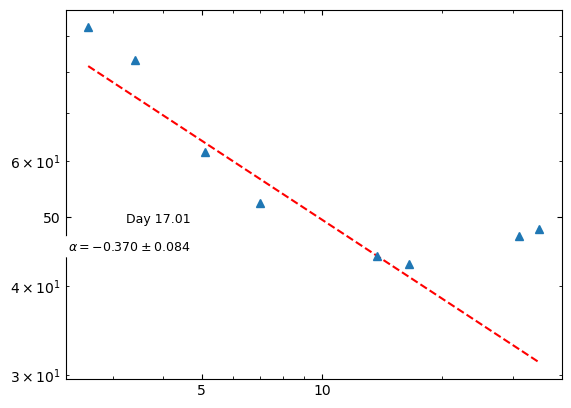

In [48]:
#plotting to check
fig,ax = plt.subplots()
mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df6['Freq (GHz)'][mask], df6['Flux Density (mJy)'][mask], yerr=df6['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 17.01', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.370 \\pm 0.084}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 27.01 (df7)

In [49]:
#(work for anything with 3+ points)
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold

x7 = df7['Freq (GHz)'][mask].values.tolist()
y7 = df7['Flux Density (mJy)'][mask].values.tolist()
yerr7 = df7['Uncertainty (mJy)'][mask].values.tolist()


In [50]:
yerr7 = error(yerr7, x7, y7) 

In [55]:
PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= -1) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7)


#weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7, 2))  

# fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)

fit_model_weights7


<PowerLaw1D(amplitude=25.8011116, x_0=82.09605104, alpha=0.34950633)>

In [56]:
fit7.fit_info

{'nfev': 20,
 'fvec': array([-0.36830055, -0.3957724 ,  0.28528841,  0.40757972, -0.20021716,
        -0.31368475, -0.68948769, -0.71151611]),
 'fjac': array([[-3.20135728e+01, -4.44220492e-01, -4.85737248e-02,
          5.65754065e-01,  9.23403865e-02,  7.63283432e-02,
          2.19917383e-02,  1.57174526e-02],
        [-4.44220492e-01,  6.82318212e-02,  7.46087533e-03,
         -7.01180633e-01, -3.69699123e-01, -3.95187100e-01,
         -2.75900589e-01, -2.36621463e-01],
        [-4.85737248e-02,  7.46087533e-03, -9.04513166e-18,
          3.83570641e-01, -1.43838990e-01,  4.79463301e-02,
          0.00000000e+00,  0.00000000e+00]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 1.30729401e-05,  3.35619400e-05, -5.10671659e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.46142271e+32, -1.33651253e+33, -2.70282229e+15],
        [-1.33651253e+33,  1.22227

In [57]:
#taking fvec
fvec7 = np.array([-0.36830055, -0.3957724 ,  0.28528841,  0.40757972, -0.20021716,
        -0.31368475, -0.68948769, -0.71151611])
var7 = np.var(fvec7)

#taking cov_x
cov_x7 = np.array([[ 1.46142271e+32, -1.33651253e+33, -2.70282229e+15],
        [-1.33651253e+33,  1.22227862e+34,  2.47180765e+16],
        [-2.70282229e+15,  2.47180765e+16,  9.23205362e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag7 = stand(cov_x7*var7) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag7[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.11604085422254407


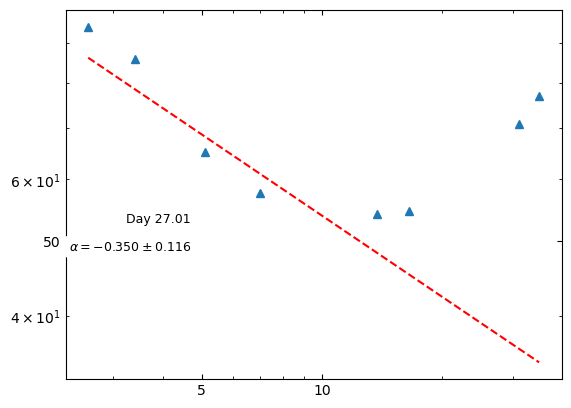

In [58]:
#plotting to check
fig,ax = plt.subplots()
mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq (GHz)'][mask], df7['Flux Density (mJy)'][mask], yerr=df7['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 27.01', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.350 \\pm 0.116}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 29.02 (df8)

In [59]:
#(work for anything with 3+ points)
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold

x8 = df8['Freq (GHz)'][mask].values.tolist()
y8 = df8['Flux Density (mJy)'][mask].values.tolist()
yerr8 = df8['Uncertainty (mJy)'][mask].values.tolist()


In [60]:
yerr8 = error(yerr8, x8, y8)

In [71]:
PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= -2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)


#weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8, 2))  

# fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)

fit_model_weights8


<PowerLaw1D(amplitude=11.52850021, x_0=859.73735546, alpha=0.33642517)>

In [72]:
fit8.fit_info

{'nfev': 54,
 'fvec': array([-0.379777  , -0.39479538,  0.42624121,  0.27548701, -0.19084104,
        -0.36236606, -0.70662683, -0.7131576 ]),
 'fjac': array([[-6.21338302e+01, -1.04981445e+00, -4.75495781e-03,
          5.73716171e-01,  1.16646353e-01,  9.41161646e-02,
          3.32042424e-02,  2.54290815e-02],
        [-1.04981445e+00,  8.42605869e-02,  3.81644141e-04,
         -7.05916456e-01, -3.95181522e-01, -3.87291841e-01,
         -2.39278732e-01, -2.00890836e-01],
        [-4.75495781e-03,  3.81644141e-04,  6.77490819e-19,
         -3.20064019e-01,  4.00080024e-02, -4.00080024e-02,
          1.00020006e-01,  2.00040012e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 1.47383690e-05,  1.02312751e-04, -3.28623033e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.46952542e+31, -9.86795798e+33,  5.15327286e+14],
        [-9.86795798e+33,  2.17867

In [73]:
#taking fvec
fvec8 = np.array([-0.379777  , -0.39479538,  0.42624121,  0.27548701, -0.19084104,
        -0.36236606, -0.70662683, -0.7131576 ])
var8 = np.var(fvec8)

#taking cov_x
cov_x8 = np.array([[ 4.46952542e+31, -9.86795798e+33,  5.15327286e+14],
        [-9.86795798e+33,  2.17867862e+36, -1.13775570e+17],
        [ 5.15327286e+14, -1.13775570e+17,  4.64093324e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag8 = stand(cov_x8*var8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag8[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.08378652824476979


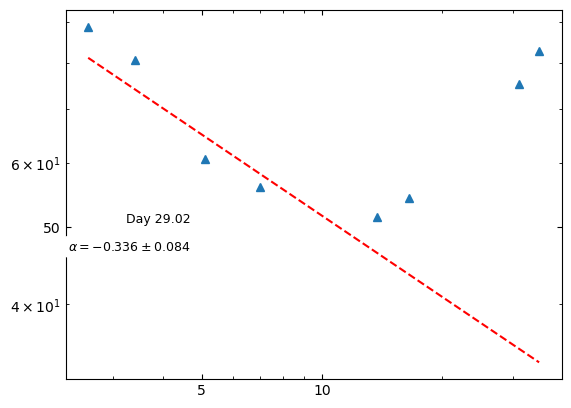

In [74]:
#plotting to check
fig,ax = plt.subplots()
mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq (GHz)'][mask], df8['Flux Density (mJy)'][mask], yerr=df8['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 29.02', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq (GHz)'][mask], fit_model_weights8(df8['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.336 \\pm 0.084}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 32.04 (df9)

In [75]:
#(work for anything with 3+ points)
mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold

x9 = df9['Freq (GHz)'][mask].values.tolist()
y9 = df9['Flux Density (mJy)'][mask].values.tolist()
yerr9 = df9['Uncertainty (mJy)'][mask].values.tolist()


In [76]:
yerr9 = error(yerr9, x9, y9)

In [77]:
PL9 =  PowerLaw1D(amplitude = y9[0], x_0= x9[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit9 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model9 = fit9(PL9, x9, y9)


#weight is 1/error^2
y_weight9 = 1/ (np.power(yerr9, 2))  

# fit the data using the uncertainties as weights
fit_model_weights9 = fit9(PL9, x9, y9, weights=y_weight9)

fit_model_weights9


<PowerLaw1D(amplitude=59.87821998, x_0=2.24513454, alpha=0.09307237)>

In [78]:
fit9.fit_info

{'nfev': 18,
 'fvec': array([ 0.023469  , -0.09640047,  0.13148761, -0.06752938]),
 'fjac': array([[ 1.07227552e+01, -5.09197224e-01, -2.05134515e-01,
          7.72643899e-01],
        [-5.09197224e-01, -2.91705748e-01, -1.17516189e-01,
         -8.81315453e-01],
        [-2.05134515e-01, -1.17516189e-01, -1.38777878e-17,
         -1.00000000e+00]]),
 'ipvt': array([2, 1, 0], dtype=int32),
 'qtf': array([ 1.09325983e-06,  6.26299764e-07, -1.52712592e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 5.19229686e+33, -2.09176179e+33, -2.58559815e+16],
        [-2.09176179e+33,  8.42684369e+32,  1.04163062e+16],
        [-2.58559815e+16,  1.04163062e+16,  1.63953322e-01]]),
 'njev': 11,
 'cov_x': array([[ 5.19229686e+33, -2.09176179e+33, -2.58559815e+16],
        [-2.09176179e+33,  8.42684369e+32,  1.04163062e+16],
        [-2.58559815e+16,  1.04163062e+16,  1.63953322e-0

In [79]:
#taking fvec
fvec9 = np.array([ 0.023469  , -0.09640047,  0.13148761, -0.06752938])
var9 = np.var(fvec9)

#taking cov_x
cov_x9 = np.array([[ 5.19229686e+33, -2.09176179e+33, -2.58559815e+16],
        [-2.09176179e+33,  8.42684369e+32,  1.04163062e+16],
        [-2.58559815e+16,  1.04163062e+16,  1.63953322e-01]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag9 = stand(cov_x9*var9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag9[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.03603082373439542


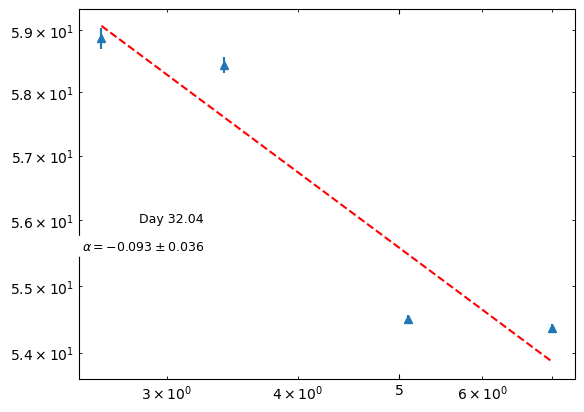

In [80]:
#plotting to check
fig,ax = plt.subplots()
mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq (GHz)'][mask], df9['Flux Density (mJy)'][mask], yerr=df9['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 32.04', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df9['Freq (GHz)'][mask], fit_model_weights9(df9['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.093 \\pm 0.036}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 33.99 (df10)

In [81]:
#(work for anything with 3+ points)
mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold

x10 = df10['Freq (GHz)'][mask].values.tolist()
y10 = df10['Flux Density (mJy)'][mask].values.tolist()
yerr10 = df10['Uncertainty (mJy)'][mask].values.tolist()


In [82]:
yerr10 = error(yerr10, x10, y10)

In [83]:
PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)


#weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10, 2))  

# fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)

fit_model_weights10


<PowerLaw1D(amplitude=15.33350072, x_0=716.7416679, alpha=0.28682788)>

In [84]:
fit10.fit_info

{'nfev': 43,
 'fvec': array([-0.30365111, -0.27589598,  0.34014728,  0.25682559, -0.25198807,
        -0.37376801, -0.65388461, -0.6484615 ]),
 'fjac': array([[-6.18223129e+01, -8.08035744e-01, -4.96338081e-03,
          5.55278082e-01,  9.92586305e-02,  8.29760323e-02,
          2.62905794e-02,  1.97924049e-02],
        [-8.08035744e-01,  6.62439568e-02,  4.06905247e-04,
         -7.49695541e-01, -3.55482045e-01, -3.60101456e-01,
         -1.99824431e-01, -1.65082350e-01],
        [-4.96338081e-03,  4.06905247e-04,  1.67838077e-18,
          5.49083893e-01,  8.07476313e-02,  1.13046684e-01,
          2.42242894e-02,  1.61495263e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 1.01127271e-05,  9.02641823e-05, -3.89328438e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.33940853e+31, -2.18054993e+33,  5.90692638e+14],
        [-2.18054993e+33,  3.54992

In [85]:
#taking fvec
fvec10 = np.array([-0.30365111, -0.27589598,  0.34014728,  0.25682559, -0.25198807,
        -0.37376801, -0.65388461, -0.6484615 ])
var10 = np.var(fvec10)

#taking cov_x
cov_x10 = np.array([[ 1.33940853e+31, -2.18054993e+33,  5.90692638e+14],
        [-2.18054993e+33,  3.54992363e+35, -9.61644458e+16],
        [ 5.90692638e+14, -9.61644458e+16,  6.52412195e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag10 = stand(cov_x10*var10) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag10[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.08778338056139479


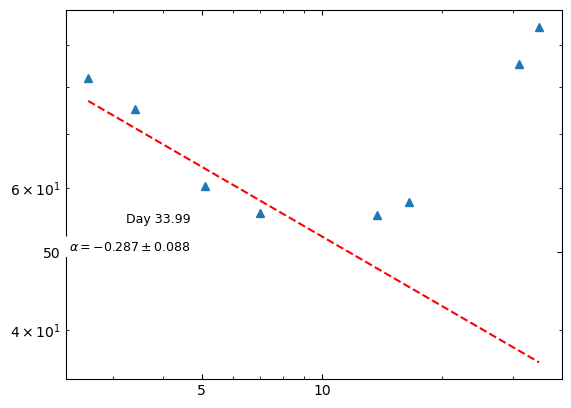

In [86]:
#plotting to check
fig,ax = plt.subplots()
mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq (GHz)'][mask], df10['Flux Density (mJy)'][mask], yerr=df10['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 33.99', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq (GHz)'][mask], fit_model_weights10(df10['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.287 \\pm 0.088}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 36.01 (df11)

In [87]:
#(work for anything with 3+ points)
mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold

x11 = df11['Freq (GHz)'][mask].values.tolist()
y11 = df11['Flux Density (mJy)'][mask].values.tolist()
yerr11 = df11['Uncertainty (mJy)'][mask].values.tolist()


In [88]:
yerr11 = error(yerr11, x11, y11)

In [89]:
PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)


#weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11, 2))  

# fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)

fit_model_weights11


<PowerLaw1D(amplitude=19.58572375, x_0=678.09504108, alpha=0.22835415)>

In [90]:
fit11.fit_info

{'nfev': 52,
 'fvec': array([-0.32098419, -0.20391293,  0.40169326,  0.16023434, -0.28263813,
        -0.3996153 , -0.61841716, -0.60602302]),
 'fjac': array([[-6.52196346e+01, -6.70368777e-01, -4.43284248e-03,
          5.25775240e-01,  8.81935243e-02,  7.17023033e-02,
          2.19022819e-02,  1.63547598e-02],
        [-6.70368777e-01,  5.42088591e-02,  3.58458421e-04,
         -7.69483404e-01, -3.33022661e-01, -3.27274427e-01,
         -1.74482600e-01, -1.42965037e-01],
        [-4.43284248e-03,  3.58458421e-04,  3.81161062e-19,
          7.11118135e-01, -3.55559067e-01, -2.48891347e-01,
         -2.48891347e-01, -2.48891347e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 9.55518226e-06,  7.10903795e-05, -8.79064211e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.00967766e+32, -4.55146769e+34,  8.15182550e+15],
        [-4.55146769e+34,  6.88308

In [91]:
#taking fvec
fvec11 = np.array([-0.32098419, -0.20391293,  0.40169326,  0.16023434, -0.28263813,
        -0.3996153 , -0.61841716, -0.60602302])
var11 = np.var(fvec11)

#taking cov_x
cov_x11 = np.array([[ 3.00967766e+32, -4.55146769e+34,  8.15182550e+15],
        [-4.55146769e+34,  6.88308201e+36, -1.23278220e+18],
        [ 8.15182550e+15, -1.23278220e+18,  2.56982964e-01]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag11 = stand(cov_x11*var11) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag11[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.16851002477468807


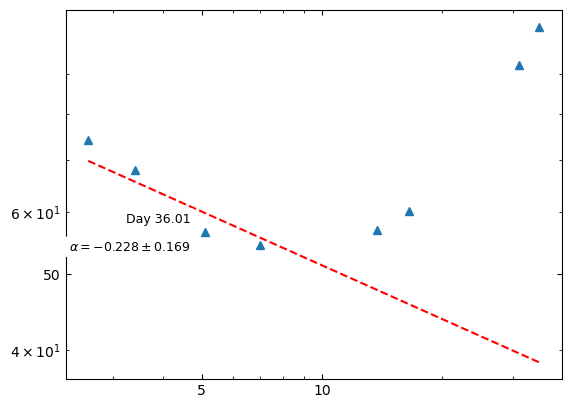

In [92]:
#plotting to check
fig,ax = plt.subplots()
mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq (GHz)'][mask], df11['Flux Density (mJy)'][mask], yerr=df11['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 36.01', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq (GHz)'][mask], fit_model_weights11(df11['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.228 \\pm 0.169}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 53.96 (df12)

In [93]:
#(work for anything with 3+ points)
mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold

x12 = df12['Freq (GHz)'][mask].values.tolist()
y12 = df12['Flux Density (mJy)'][mask].values.tolist()
yerr12 = df12['Uncertainty (mJy)'][mask].values.tolist()


In [119]:
yerr12 = error(yerr12, x12, y12)

In [120]:
PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= -3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)


#weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12, 2))  

# fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)

fit_model_weights12


<PowerLaw1D(amplitude=12.23338981, x_0=834.42194804, alpha=0.28352831)>

In [121]:
fit12.fit_info

{'nfev': 62,
 'fvec': array([-0.11805603, -0.1390707 ,  0.16298192,  0.12737298, -0.22977516,
        -0.29763902, -0.35966734, -0.34298007]),
 'fjac': array([[-3.88744219e+01, -6.14622877e-01, -2.55132103e-03,
          5.49214455e-01,  7.86801638e-02,  6.06636028e-02,
          1.55239996e-02,  1.15129685e-02],
        [-6.14622877e-01,  4.66615189e-02,  1.93693595e-04,
         -8.17773842e-01, -3.00240550e-01, -2.79125914e-01,
         -1.23329905e-01, -1.00116324e-01],
        [-2.55132103e-03,  1.93693595e-04, -1.74940502e-19,
          3.09877405e-01,  3.87346756e-02,  1.93673378e-01,
         -1.93673378e-02,  1.93673378e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 8.02504172e-06,  6.13090575e-05, -1.26927622e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 5.63030655e+32, -1.35636212e+35, -1.89697242e+15],
        [-1.35636212e+35,  3.26752

In [122]:
#taking fvec
fvec12 = np.array([-0.11805603, -0.1390707 ,  0.16298192,  0.12737298, -0.22977516,
        -0.29763902, -0.35966734, -0.34298007])
var12 = np.var(fvec12)

#taking cov_x
cov_x12 = np.array([[ 5.63030655e+32, -1.35636212e+35, -1.89697242e+15],
        [-1.35636212e+35,  3.26752760e+37,  4.56987824e+17],
        [-1.89697242e+15,  4.56987824e+17,  1.21860938e-01]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag12 = stand(cov_x12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag12[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.06593416923708988


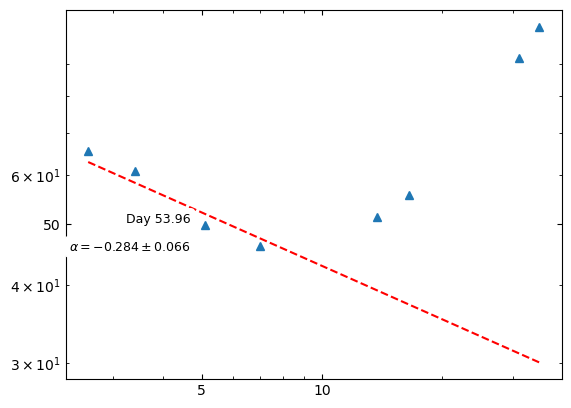

In [123]:
#plotting to check
fig,ax = plt.subplots()
mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq (GHz)'][mask], df12['Flux Density (mJy)'][mask], yerr=df12['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 53.96', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df12['Freq (GHz)'][mask], fit_model_weights12(df12['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.284 \\pm 0.066}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 76.94 (df13)

In [124]:
#(work for anything with 3+ points)
mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold

x13 = df13['Freq (GHz)'][mask].values.tolist()
y13 = df13['Flux Density (mJy)'][mask].values.tolist()
yerr13 = df13['Uncertainty (mJy)'][mask].values.tolist()


In [125]:
yerr13 = error(yerr13, x13, y13)

In [126]:
PL13 =  PowerLaw1D(amplitude = y13[0], x_0= x13[0], alpha= -1) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit13 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model13 = fit13(PL13, x13, y13)


#weight is 1/error^2
y_weight13 = 1/ (np.power(yerr13, 2))  

# fit the data using the uncertainties as weights
fit_model_weights13 = fit13(PL13, x13, y13, weights=y_weight13)

fit_model_weights13


<PowerLaw1D(amplitude=37.8594619, x_0=6.16394692, alpha=-0.35932405)>

In [127]:
fit13.fit_info

{'nfev': 16,
 'fvec': array([ 0.18418854, -0.17129513, -0.32672975,  0.27772379]),
 'fjac': array([[-1.49259406e+01,  1.12531963e+00, -5.09887146e-01,
         -9.06255391e-02],
        [ 1.12531963e+00,  8.82799153e-01, -4.00000079e-01,
          8.12253885e-01],
        [-5.09887146e-01, -4.00000079e-01, -1.14439170e-16,
          9.70142500e-01]]),
 'ipvt': array([2, 1, 0], dtype=int32),
 'qtf': array([-1.19157237e-05, -9.34614709e-06, -3.62101382e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 7.63573067e+31,  3.45978229e+31, -6.93752964e+14],
        [ 3.45978229e+31,  1.56764218e+31, -3.14342441e+14],
        [-6.93752964e+14, -3.14342441e+14,  1.80854738e-02]]),
 'njev': 8,
 'cov_x': array([[ 7.63573067e+31,  3.45978229e+31, -6.93752964e+14],
        [ 3.45978229e+31,  1.56764218e+31, -3.14342441e+14],
        [-6.93752964e+14, -3.14342441e+14,  1.80854738e-02

In [128]:
#taking fvec
fvec13 = np.array([ 0.18418854, -0.17129513, -0.32672975,  0.27772379])
var13 = np.var(fvec13)

#taking cov_x
cov_x13 = np.array([[ 7.63573067e+31,  3.45978229e+31, -6.93752964e+14],
        [ 3.45978229e+31,  1.56764218e+31, -3.14342441e+14],
        [-6.93752964e+14, -3.14342441e+14,  1.80854738e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag13 = stand(cov_x13*var13) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag13[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.033406336954901986


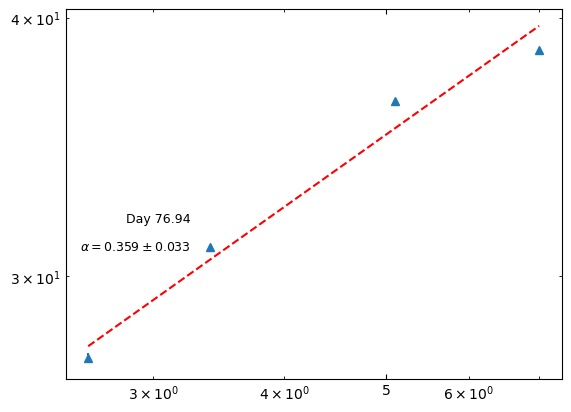

In [129]:
#plotting to check
fig,ax = plt.subplots()
mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df13['Freq (GHz)'][mask], df13['Flux Density (mJy)'][mask], yerr=df13['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 76.94', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df13['Freq (GHz)'][mask], fit_model_weights13(df13['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.359 \\pm 0.033}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 77.92 (df14)

In [130]:
#(work for anything with 3+ points)
mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold

x14 = df14['Freq (GHz)'][mask].values.tolist()
y14 = df14['Flux Density (mJy)'][mask].values.tolist()
yerr14 = df14['Uncertainty (mJy)'][mask].values.tolist()


In [131]:
yerr14 = error(yerr14, x14, y14)

In [132]:
PL14 =  PowerLaw1D(amplitude = y14[0], x_0= x14[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit14 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model14 = fit14(PL14, x14, y14)


#weight is 1/error^2
y_weight14 = 1/ (np.power(yerr14, 2))  

# fit the data using the uncertainties as weights
fit_model_weights14 = fit14(PL14, x14, y14, weights=y_weight14)

fit_model_weights14


<PowerLaw1D(amplitude=58.03284856, x_0=750.69025091, alpha=-0.08757128)>

In [133]:
fit14.fit_info

{'nfev': 49,
 'fvec': array([-0.24495612, -0.08426903,  0.3820162 ,  0.087995  , -0.23463288,
        -0.34695743, -0.56292812, -0.56346715]),
 'fjac': array([[-1.13781966e+02, -3.77215818e-01,  2.54815451e-03,
          4.33587652e-01,  6.86181598e-02,  5.50493959e-02,
          1.94560548e-02,  1.53038087e-02],
        [-3.77215818e-01,  2.96130258e-02, -2.00040830e-04,
         -7.73060034e-01, -2.85102785e-01, -2.73004969e-01,
         -1.63552745e-01, -1.40582356e-01],
        [ 2.54815451e-03, -2.00040830e-04,  4.54666583e-19,
          9.53843729e-01,  1.93749507e-01,  1.78845699e-01,
          1.19230466e-01,  7.45190413e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([1.58475214e-06, 4.85259629e-05, 5.05682427e-02]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.20742346e+32,  3.26775728e+34, -4.84398139e+14],
        [ 3.26775728e+34,  4.83742148

In [134]:
#taking fvec
fvec14 = np.array([-0.24495612, -0.08426903,  0.3820162 ,  0.087995  , -0.23463288,
        -0.34695743, -0.56292812, -0.56346715])
var14 = np.var(fvec14)

#taking cov_x
cov_x14 = np.array([[ 2.20742346e+32,  3.26775728e+34, -4.84398139e+14],
        [ 3.26775728e+34,  4.83742148e+36, -7.17078338e+16],
        [-4.84398139e+14, -7.17078338e+16,  1.36735631e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag14 = stand(cov_x14*var14) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag14[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.03516743783027706


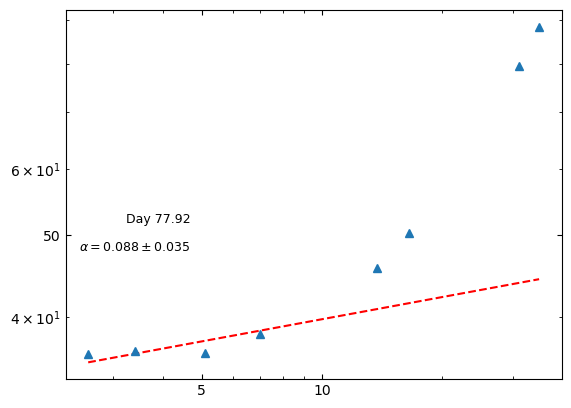

In [135]:
#plotting to check
fig,ax = plt.subplots()
mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df14['Freq (GHz)'][mask], df14['Flux Density (mJy)'][mask], yerr=df14['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 77.92', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df14['Freq (GHz)'][mask], fit_model_weights14(df14['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.088 \\pm 0.035}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 89.82 (df15)

In [136]:
#(work for anything with 3+ points)
mask = df15['Flux Density (mJy)'] > 3 * df15['Uncertainty (mJy)']  # apply detection threshold

x15 = df15['Freq (GHz)'][mask].values.tolist()
y15 = df15['Flux Density (mJy)'][mask].values.tolist()
yerr15 = df15['Uncertainty (mJy)'][mask].values.tolist()


In [137]:
yerr15 = error(yerr15, x15, y15)

In [144]:
PL15 =  PowerLaw1D(amplitude = y15[0], x_0= x15[0], alpha= -3.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit15 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model15 = fit15(PL15, x15, y15)


#weight is 1/error^2
y_weight15 = 1/ (np.power(yerr15, 2))  

# fit the data using the uncertainties as weights
fit_model_weights15 = fit15(PL15, x15, y15, weights=y_weight15)

fit_model_weights15


<PowerLaw1D(amplitude=35.88856068, x_0=827.95748398, alpha=-0.01903366)>

In [145]:
fit15.fit_info

{'nfev': 63,
 'fvec': array([-0.29418409, -0.0733404 ,  0.2859398 ,  0.26865753, -0.33907929,
        -0.4757948 , -0.74097126, -0.73560635]),
 'fjac': array([[-1.31088901e+02, -6.93666780e-01,  5.73214534e-04,
          4.63220199e-01,  7.14269396e-02,  5.77131531e-02,
          1.93337174e-02,  1.53079796e-02],
        [-6.93666780e-01,  5.41135780e-02, -4.47169885e-05,
         -7.89262910e-01, -2.87180720e-01, -2.77184233e-01,
         -1.57280513e-01, -1.36004079e-01],
        [ 5.73214534e-04, -4.47169885e-05,  8.95814933e-20,
         -3.02574263e-01, -1.89108914e-02,  1.13465349e-01,
          2.83663372e-02,  1.89108914e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 2.42394726e-06,  3.44030378e-05, -1.76220433e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 8.50934237e+31,  1.02974502e+35, -9.03982898e+13],
        [ 1.02974502e+35,  1.24613

In [146]:
#taking fvec
fvec15 = np.array([-0.29418409, -0.0733404 ,  0.2859398 ,  0.26865753, -0.33907929,
        -0.4757948 , -0.74097126, -0.73560635])
var15 = np.var(fvec15)

#taking cov_x
cov_x15 = np.array([[ 8.50934237e+31,  1.02974502e+35, -9.03982898e+13],
        [ 1.02974502e+35,  1.24613015e+38, -1.09394105e+17],
        [-9.03982898e+13, -1.09394105e+17,  9.71641816e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag15 = stand(cov_x15*var15) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag15[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.036945082256276726


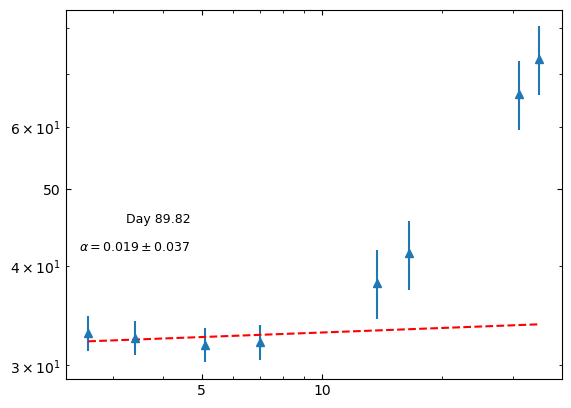

In [148]:
#plotting to check
fig,ax = plt.subplots()
mask = df15['Flux Density (mJy)'] > 3 * df15['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df15['Freq (GHz)'][mask], df15['Flux Density (mJy)'][mask], yerr=yerr15, fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 89.82', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df15['Freq (GHz)'][mask], fit_model_weights15(df15['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.019 \\pm 0.037}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 140.76 (df16)

In [149]:
#(work for anything with 3+ points)
mask = df16['Flux Density (mJy)'] > 3 * df16['Uncertainty (mJy)']  # apply detection threshold

x16 = df16['Freq (GHz)'][mask].values.tolist()
y16 = df16['Flux Density (mJy)'][mask].values.tolist()
yerr16 = df16['Uncertainty (mJy)'][mask].values.tolist()


In [150]:
yerr16 = error(yerr16, x16, y16)

In [153]:
PL16 =  PowerLaw1D(amplitude = y16[0], x_0= x16[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit16 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model16 = fit16(PL16, x16, y16)


#weight is 1/error^2
y_weight16 = 1/ (np.power(yerr16, 2))  

# fit the data using the uncertainties as weights
fit_model_weights16 = fit16(PL16, x16, y16, weights=y_weight16)

fit_model_weights16


<PowerLaw1D(amplitude=32.230776, x_0=766.97517534, alpha=-0.11053236)>

In [154]:
fit16.fit_info

{'nfev': 53,
 'fvec': array([-0.84634969, -0.03858447,  1.351511  , -0.36397567, -0.71979613,
        -0.80744409, -1.09279285, -1.0845941 ]),
 'fjac': array([[-2.25743294e+02, -1.34533763e+00,  6.26697273e-03,
          4.16725304e-01,  5.76926173e-02,  4.92886393e-02,
          1.78677325e-02,  1.40197269e-02],
        [-1.34533763e+00,  1.00695888e-01, -4.69070640e-04,
         -7.68467474e-01, -2.49176711e-01, -2.54215291e-01,
         -1.56306469e-01, -1.34020342e-01],
        [ 6.26697273e-03, -4.69070640e-04,  7.97759355e-19,
          2.71811835e-01, -1.35905918e-01, -2.03858877e-01,
         -1.18917678e-01, -1.01929438e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 1.27139574e-07,  1.35412850e-04, -2.09551300e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.40964542e+31,  7.31952171e+33, -4.39659482e+14],
        [ 7.31952171e+33,  1.57128

In [155]:
#taking fvec
fvec16 = np.array([-0.84634969, -0.03858447,  1.351511  , -0.36397567, -0.71979613,
        -0.80744409, -1.09279285, -1.0845941 ])
var16 = np.var(fvec16)

#taking cov_x
cov_x16 = np.array([[ 3.40964542e+31,  7.31952171e+33, -4.39659482e+14],
        [ 7.31952171e+33,  1.57128943e+36, -9.43821638e+16],
        [-4.39659482e+14, -9.43821638e+16,  9.19159997e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag16 = stand(cov_x16*var16) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag16[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.07266476011076256


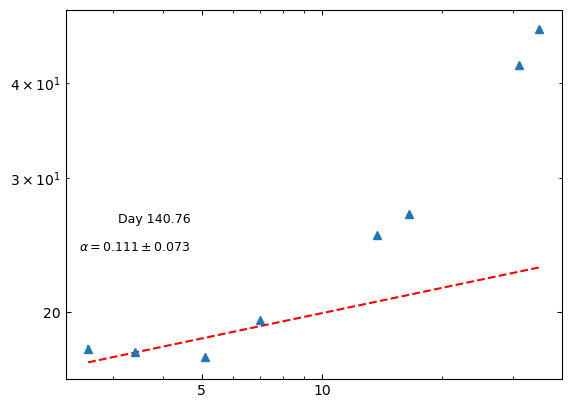

In [156]:
#plotting to check
fig,ax = plt.subplots()
mask = df16['Flux Density (mJy)'] > 3 * df16['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df16['Freq (GHz)'][mask], df16['Flux Density (mJy)'][mask], yerr=df16['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 140.76', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df16['Freq (GHz)'][mask], fit_model_weights16(df16['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.111 \\pm 0.073}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 154.66 (df17)

In [157]:
#(work for anything with 3+ points)
mask = df17['Flux Density (mJy)'] > 3 * df17['Uncertainty (mJy)']  # apply detection threshold

x17 = df17['Freq (GHz)'][mask].values.tolist()
y17 = df17['Flux Density (mJy)'][mask].values.tolist()
yerr17 = df17['Uncertainty (mJy)'][mask].values.tolist()


In [158]:
yerr17 = error(yerr17, x17, y17)

In [163]:
PL17 =  PowerLaw1D(amplitude = y17[0], x_0= x17[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit17 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model17 = fit17(PL17, x17, y17)


#weight is 1/error^2
y_weight17 = 1/ (np.power(yerr17, 2))  

# fit the data using the uncertainties as weights
fit_model_weights17 = fit17(PL17, x17, y17, weights=y_weight17)

fit_model_weights17


<PowerLaw1D(amplitude=8.03052243, x_0=829.77695804, alpha=0.17961271)>

In [164]:
fit17.fit_info

{'nfev': 51,
 'fvec': array([-1.28151701, -0.87619484,  1.72159332,  0.36205438, -1.03198012,
        -1.20702086, -1.70838616, -1.75736603]),
 'fjac': array([[-2.01491522e+02, -4.85713555e+00, -8.46460336e-03,
          5.15971602e-01,  7.31826845e-02,  6.41736847e-02,
          3.35778241e-02,  2.94901409e-02],
        [-4.85713555e+00,  3.76317836e-01,  6.55814766e-04,
         -7.50044030e-01, -2.73668151e-01, -2.89500831e-01,
         -2.61856791e-01, -2.51781300e-01],
        [-8.46460336e-03,  6.55814766e-04,  1.95945360e-18,
          2.21327450e-01,  2.76659312e-02,  6.91648281e-02,
          5.53318624e-02,  6.91648281e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 1.92510191e-05,  1.60440065e-04, -1.81898411e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 7.91011520e+29, -4.53896067e+32,  2.94679906e+13],
        [-4.53896067e+32,  2.60453

In [165]:
#taking fvec
fvec17 = np.array([-1.28151701, -0.87619484,  1.72159332,  0.36205438, -1.03198012,
        -1.20702086, -1.70838616, -1.75736603])
var17 = np.var(fvec17)

#taking cov_x
cov_x17 = np.array([[ 7.91011520e+29, -4.53896067e+32,  2.94679906e+13],
        [-4.53896067e+32,  2.60453400e+35, -1.69092418e+16],
        [ 2.94679906e+13, -1.69092418e+16,  5.22575660e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag17 = stand(cov_x17*var17) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag17[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.08025193226462374


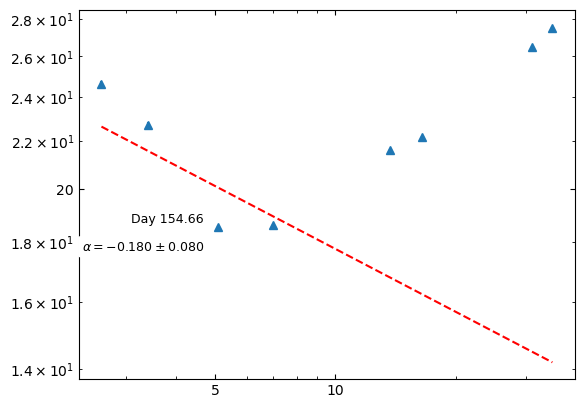

In [166]:
#plotting to check
fig,ax = plt.subplots()
mask = df17['Flux Density (mJy)'] > 3 * df17['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df17['Freq (GHz)'][mask], df17['Flux Density (mJy)'][mask], yerr=df17['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 154.66', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df17['Freq (GHz)'][mask], fit_model_weights17(df17['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.180 \\pm 0.080}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 156.61 (df18)

In [167]:
#(work for anything with 3+ points)
mask = df18['Flux Density (mJy)'] > 3 * df18['Uncertainty (mJy)']  # apply detection threshold

x18 = df18['Freq (GHz)'][mask].values.tolist()
y18 = df18['Flux Density (mJy)'][mask].values.tolist()
yerr18 = df18['Uncertainty (mJy)'][mask].values.tolist()


In [168]:
yerr18 = error(yerr18, x18, y18)

In [169]:
PL18 =  PowerLaw1D(amplitude = y18[0], x_0= x18[0], alpha= -.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit18 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model18 = fit18(PL18, x18, y18)


#weight is 1/error^2
y_weight18 = 1/ (np.power(yerr18, 2))  

# fit the data using the uncertainties as weights
fit_model_weights18 = fit18(PL18, x18, y18, weights=y_weight18)

fit_model_weights18


<PowerLaw1D(amplitude=18.65400229, x_0=10.59011245, alpha=0.14520782)>

In [170]:
fit18.fit_info

{'nfev': 18,
 'fvec': array([-0.98900635, -0.47803039,  0.9640636 ,  0.69554909, -0.8201535 ,
        -1.04042797, -1.54002027, -1.58621751]),
 'fjac': array([[-3.38233727e+01, -1.81239175e+00, -4.63568106e-01,
          2.63184275e-01, -2.84847480e-02, -4.33525367e-02,
         -6.31634078e-02, -6.24119072e-02],
        [-1.81239175e+00,  9.43655575e-01,  2.41365382e-01,
         -7.71651709e-01, -2.61256705e-01, -2.61944186e-01,
         -2.20611874e-01, -2.07226528e-01],
        [-4.63568106e-01,  2.41365382e-01,  1.23348476e-16,
          6.75052741e-01,  1.12508790e-01,  2.25017580e-01,
          1.12508790e-01,  1.12508790e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 7.44107015e-05, -3.84222564e-05, -6.02196726e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.29987039e+30, -1.68110134e+31, -6.30537700e+13],
        [-1.68110134e+31,  6.57252

In [171]:
#taking fvec
fvec18 = np.array([-0.98900635, -0.47803039,  0.9640636 ,  0.69554909, -0.8201535 ,
        -1.04042797, -1.54002027, -1.58621751])
var18 = np.var(fvec18)

#taking cov_x
cov_x18 = np.array([[ 4.29987039e+30, -1.68110134e+31, -6.30537700e+13],
        [-1.68110134e+31,  6.57252767e+31,  2.46518540e+14],
        [-6.30537700e+13,  2.46518540e+14,  5.02309598e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag18 = stand(cov_x18*var18) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag18[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.06334016920541749


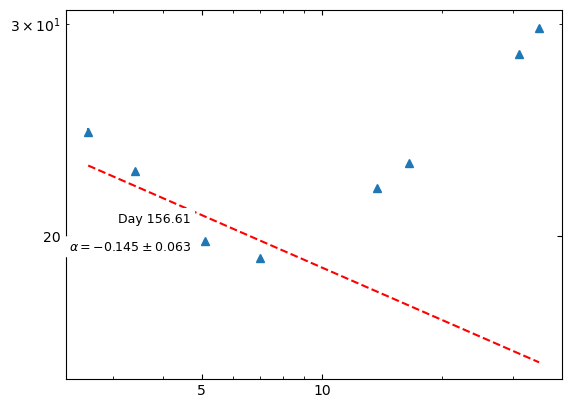

In [172]:
#plotting to check
fig,ax = plt.subplots()
mask = df18['Flux Density (mJy)'] > 3 * df18['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df18['Freq (GHz)'][mask], df18['Flux Density (mJy)'][mask], yerr=df18['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 156.61', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df18['Freq (GHz)'][mask], fit_model_weights18(df18['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.145 \\pm 0.063}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 161.61 (df19)

In [173]:
#(work for anything with 3+ points)
mask = df19['Flux Density (mJy)'] > 3 * df19['Uncertainty (mJy)']  # apply detection threshold

x19 = df19['Freq (GHz)'][mask].values.tolist()
y19 = df19['Flux Density (mJy)'][mask].values.tolist()
yerr19 = df19['Uncertainty (mJy)'][mask].values.tolist()


In [174]:
yerr19 = error(yerr19, x19, y19)

In [175]:
PL19 =  PowerLaw1D(amplitude = y19[0], x_0= x19[0], alpha= 6.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit19 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model19 = fit19(PL19, x19, y19)


#weight is 1/error^2
y_weight19 = 1/ (np.power(yerr19, 2))  

# fit the data using the uncertainties as weights
fit_model_weights19 = fit19(PL19, x19, y19, weights=y_weight19)

fit_model_weights19


<PowerLaw1D(amplitude=21.77902575, x_0=2.09339822, alpha=0.15896184)>

In [176]:
fit19.fit_info

{'nfev': 21,
 'fvec': array([-1.55203821, -0.52991918,  1.84508297,  0.1315041 , -1.06000212,
        -1.29096362, -1.7561196 , -1.79207927]),
 'fjac': array([[ 3.80338593e+01, -2.84601862e+00, -1.72424088e+00,
          7.10679582e-01,  1.85926417e-01,  1.78032141e-01,
          1.36536077e-01,  1.27846955e-01],
        [-2.84601862e+00, -1.33260629e+00, -8.07350393e-01,
         -6.93167119e-01, -3.00736208e-01, -3.06468116e-01,
         -2.68695251e-01, -2.55800606e-01],
        [-1.72424088e+00, -8.07350393e-01,  5.19259273e-16,
          6.41426981e-01,  2.67261242e-01,  1.06904497e-01,
          1.06904497e-01,  1.06904497e-01]]),
 'ipvt': array([2, 1, 0], dtype=int32),
 'qtf': array([ 2.65869211e-04,  6.98848019e-05, -1.82183693e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.70878347e+30, -2.24694106e+30,  2.47296783e+13],
        [-2.24694106e+30,  1.36129

In [177]:
#taking fvec
fvec19 = np.array([-1.55203821, -0.52991918,  1.84508297,  0.1315041 , -1.06000212,
        -1.29096362, -1.7561196 , -1.79207927])
var19 = np.var(fvec19)

#taking cov_x
cov_x19 = np.array([[ 3.70878347e+30, -2.24694106e+30,  2.47296783e+13],
        [-2.24694106e+30,  1.36129384e+30, -1.49823062e+13],
        [ 2.47296783e+13, -1.49823062e+13,  4.00923329e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag19 = stand(cov_x19*var19) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag19[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.07319435945585713


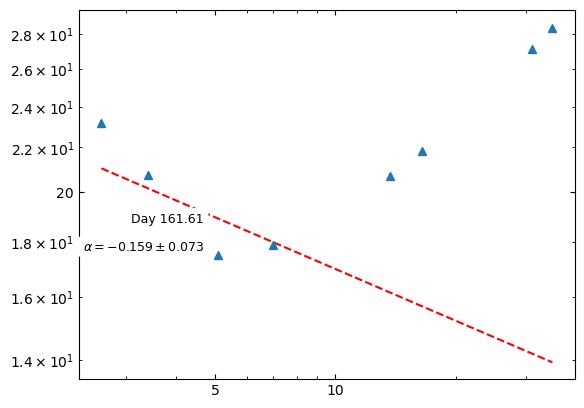

In [178]:
#plotting to check
fig,ax = plt.subplots()
mask = df19['Flux Density (mJy)'] > 3 * df19['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df19['Freq (GHz)'][mask], df19['Flux Density (mJy)'][mask], yerr=df19['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 161.61', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df19['Freq (GHz)'][mask], fit_model_weights19(df19['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.159 \\pm 0.073}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 600.47 (df20)

In [179]:
#(work for anything with 3+ points)
mask = df20['Flux Density (mJy)'] > 3 * df20['Uncertainty (mJy)']  # apply detection threshold

x20 = df20['Freq (GHz)'][mask].values.tolist()
y20 = df20['Flux Density (mJy)'][mask].values.tolist()
yerr20 = df20['Uncertainty (mJy)'][mask].values.tolist()


In [180]:
yerr20 = error(yerr20, x20, y20)

In [181]:
PL20 =  PowerLaw1D(amplitude = y20[0], x_0= x20[0], alpha= -4.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit20 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model20 = fit20(PL20, x20, y20)


#weight is 1/error^2
y_weight20 = 1/ (np.power(yerr20, 2))  

# fit the data using the uncertainties as weights
fit_model_weights20 = fit20(PL20, x20, y20, weights=y_weight20)

fit_model_weights20


<PowerLaw1D(amplitude=0.14593666, x_0=1057.17592694, alpha=0.54693872)>

In [182]:
fit20.fit_info

{'nfev': 68,
 'fvec': array([10.82069124,  0.63799777, -3.02879966, -4.77911036, -3.28123377,
        -4.09331547,  7.62778745,  4.13013837]),
 'fjac': array([[-1.64215244e+03, -1.24044487e-01, -1.20774442e+03,
          5.85533062e-01,  2.15350627e-01,  2.28849412e-01,
          2.38417684e-01,  2.01368288e-01],
        [-1.24044487e-01, -2.47768071e-17, -5.30382876e-08,
          5.60112034e-01,  2.80056017e-01,  4.20084025e-01,
          1.40028008e-01,  1.40028008e-01],
        [-1.20774442e+03,  6.75223506e+01, -1.47296711e+02,
         -1.41837214e-01, -2.76043505e-01, -3.43689440e-01,
         -6.49929030e-01, -5.83347004e-01]]),
 'ipvt': array([0, 1, 2], dtype=int32),
 'qtf': array([6.53690467e-06, 1.29687213e+01, 5.94537236e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.12479397e+25, -1.48904898e+29, -9.48811879e+09],
        [-1.48904898e+29,  1.97126489

In [183]:
#taking fvec
fvec20 = np.array([10.82069124,  0.63799777, -3.02879966, -4.77911036, -3.28123377,
        -4.09331547,  7.62778745,  4.13013837])
var20 = np.var(fvec20)

#taking cov_x
cov_x20 = np.array([[ 1.12479397e+25, -1.48904898e+29, -9.48811879e+09],
        [-1.48904898e+29,  1.97126489e+33,  1.25607658e+14],
        [-9.48811879e+09,  1.25607658e+14,  4.60907636e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag20 = stand(cov_x20*var20) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag20[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.03750912229049003


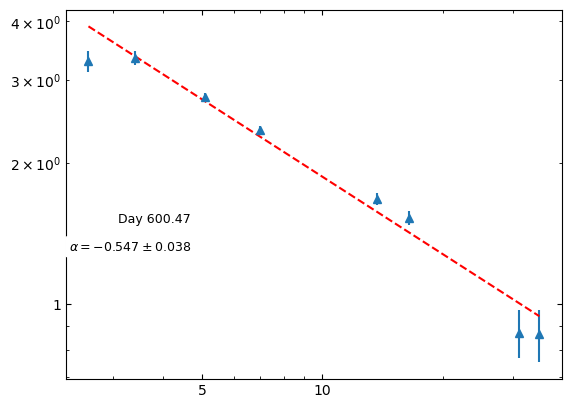

In [184]:
#plotting to check
fig,ax = plt.subplots()
mask = df20['Flux Density (mJy)'] > 3 * df20['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df20['Freq (GHz)'][mask], df20['Flux Density (mJy)'][mask], yerr=df20['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 600.47', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df20['Freq (GHz)'][mask], fit_model_weights20(df20['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.547 \\pm 0.038}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


 ## Day 615.34 (df21)

In [185]:
#(work for anything with 3+ points)
mask = df21['Flux Density (mJy)'] > 3 * df21['Uncertainty (mJy)']  # apply detection threshold

x21 = df21['Freq (GHz)'][mask].values.tolist()
y21 = df21['Flux Density (mJy)'][mask].values.tolist()
yerr21 = df21['Uncertainty (mJy)'][mask].values.tolist()


In [186]:
yerr21 = error(yerr21, x21, y21)

In [187]:
PL21 =  PowerLaw1D(amplitude = y21[0], x_0= x21[0], alpha= -2) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit21 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model21 = fit21(PL21, x21, y21)


#weight is 1/error^2
y_weight21 = 1/ (np.power(yerr21, 2))  

# fit the data using the uncertainties as weights
fit_model_weights21 = fit21(PL21, x21, y21, weights=y_weight21)

fit_model_weights21


<PowerLaw1D(amplitude=0.32299541, x_0=958.87993185, alpha=0.39305323)>

In [188]:
fit21.fit_info

{'nfev': 29,
 'fvec': array([10.7871569 ,  5.65392979, -7.40976953, -8.60361914,  1.5077558 ,
         2.0576091 ,  7.0023745 ,  2.79565275]),
 'fjac': array([[-1.27222974e+03, -7.71769089e+02, -1.02181169e-01,
          5.33405314e-01,  1.89734908e-01,  1.95455954e-01,
          1.41339888e-01,  1.15486998e-01],
        [-7.71769089e+02,  1.01831569e+02,  1.34823601e-02,
         -2.84106736e-01, -3.36832247e-01, -4.28451660e-01,
         -5.58620756e-01, -5.01773362e-01],
        [-1.02181169e-01,  1.34823601e-02,  9.93584190e-18,
         -8.72962499e-02, -3.49185000e-01, -6.11073749e-01,
         -5.23777500e-01, -8.72962499e-02]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([ 4.31443865e-04, -4.73032350e-04,  8.57387866e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.77565108e+26, -1.34114008e+30,  3.98027684e+10],
        [-1.34114008e+30,  1.01295

In [189]:
#taking fvec
fvec21 = np.array([10.7871569 ,  5.65392979, -7.40976953, -8.60361914,  1.5077558 ,
         2.0576091 ,  7.0023745 ,  2.79565275])
var21 = np.var(fvec21)

#taking cov_x
cov_x21 = np.array([[ 1.77565108e+26, -1.34114008e+30,  3.98027684e+10],
        [-1.34114008e+30,  1.01295617e+34, -3.00628253e+14],
        [ 3.98027684e+10, -3.00628253e+14,  4.50277452e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag21 = stand(cov_x21*var21) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag21[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.0422293097752915


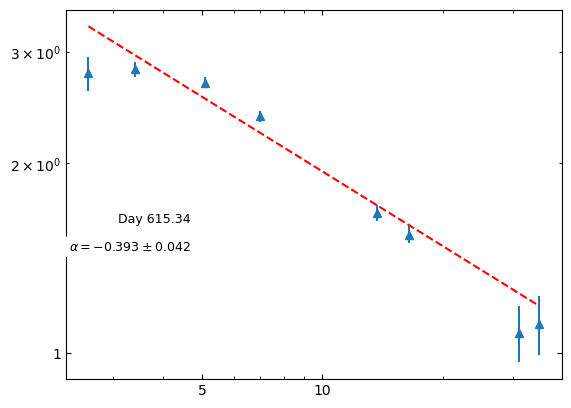

In [190]:
#plotting to check
fig,ax = plt.subplots()
mask = df21['Flux Density (mJy)'] > 3 * df21['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df21['Freq (GHz)'][mask], df21['Flux Density (mJy)'][mask], yerr=df21['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 615.34', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df21['Freq (GHz)'][mask], fit_model_weights21(df21['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.393 \\pm 0.042}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Day 697.12 (df22)

In [191]:
#(work for anything with 3+ points)
mask = df22['Flux Density (mJy)'] > 3 * df22['Uncertainty (mJy)']  # apply detection threshold

x22 = df22['Freq (GHz)'][mask].values.tolist()
y22 = df22['Flux Density (mJy)'][mask].values.tolist()
yerr22 = df22['Uncertainty (mJy)'][mask].values.tolist()


In [192]:
yerr22 = error(yerr22, x22, y22)

In [193]:
PL22 =  PowerLaw1D(amplitude = y22[0], x_0= x22[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit22 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model22 = fit22(PL22, x22, y22)


#weight is 1/error^2
y_weight22 = 1/ (np.power(yerr22, 2))  

# fit the data using the uncertainties as weights
fit_model_weights22 = fit22(PL22, x22, y22, weights=y_weight22)

fit_model_weights22


<PowerLaw1D(amplitude=1.4304074, x_0=977.69024352, alpha=0.05682559)>

In [194]:
fit22.fit_info

{'nfev': 25,
 'fvec': array([ 23.11062027,  -2.52977031, -19.63729938, -31.65507353,
         -2.91295693,  -3.18099722,  18.19475779,  18.14165396]),
 'fjac': array([[-2.13761916e+03, -2.72455244e+02, -2.24829948e-02,
          3.13798054e-01,  9.65393693e-02,  9.21045031e-02,
          1.26660469e-01,  1.15931583e-01],
        [-2.72455244e+02,  3.55889035e+01,  2.93679476e-03,
         -3.34983363e-01, -2.31844472e-01, -2.62357859e-01,
         -5.99512389e-01, -5.97382418e-01],
        [-2.24829948e-02,  2.93679476e-03,  8.04065851e-19,
          5.39359890e-01, -1.34839972e-01, -4.04519917e-01,
          2.69679945e-01,  5.39359890e-01]]),
 'ipvt': array([2, 0, 1], dtype=int32),
 'qtf': array([-6.66630186e-04, -6.11525128e-03,  1.98244717e+01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.05325794e+28, -1.27636755e+32,  3.42133670e+11],
        [-1.27636755e+32, 

In [195]:
#taking fvec
fvec22 = np.array([ 23.11062027,  -2.52977031, -19.63729938, -31.65507353,
         -2.91295693,  -3.18099722,  18.19475779,  18.14165396])
var22 = np.var(fvec22)

#taking cov_x
cov_x22 = np.array([[ 1.05325794e+28, -1.27636755e+32,  3.42133670e+11],
        [-1.27636755e+32,  1.54673803e+36, -4.14607188e+15],
        [ 3.42133670e+11, -4.14607188e+15,  2.41587733e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag22 = stand(cov_x22*var22) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag22[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.0887269846274669


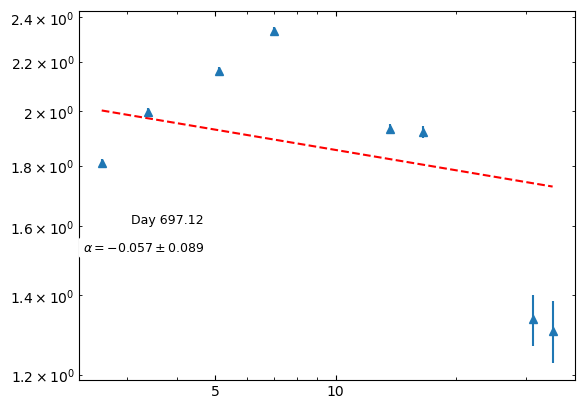

In [196]:
#plotting to check
fig,ax = plt.subplots()
mask = df22['Flux Density (mJy)'] > 3 * df22['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df22['Freq (GHz)'][mask], df22['Flux Density (mJy)'][mask], yerr=df22['Uncertainty (mJy)'][mask], fmt='^')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 697.12', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df22['Freq (GHz)'][mask], fit_model_weights22(df22['Freq (GHz)'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.057 \\pm 0.089}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Now to put it all together

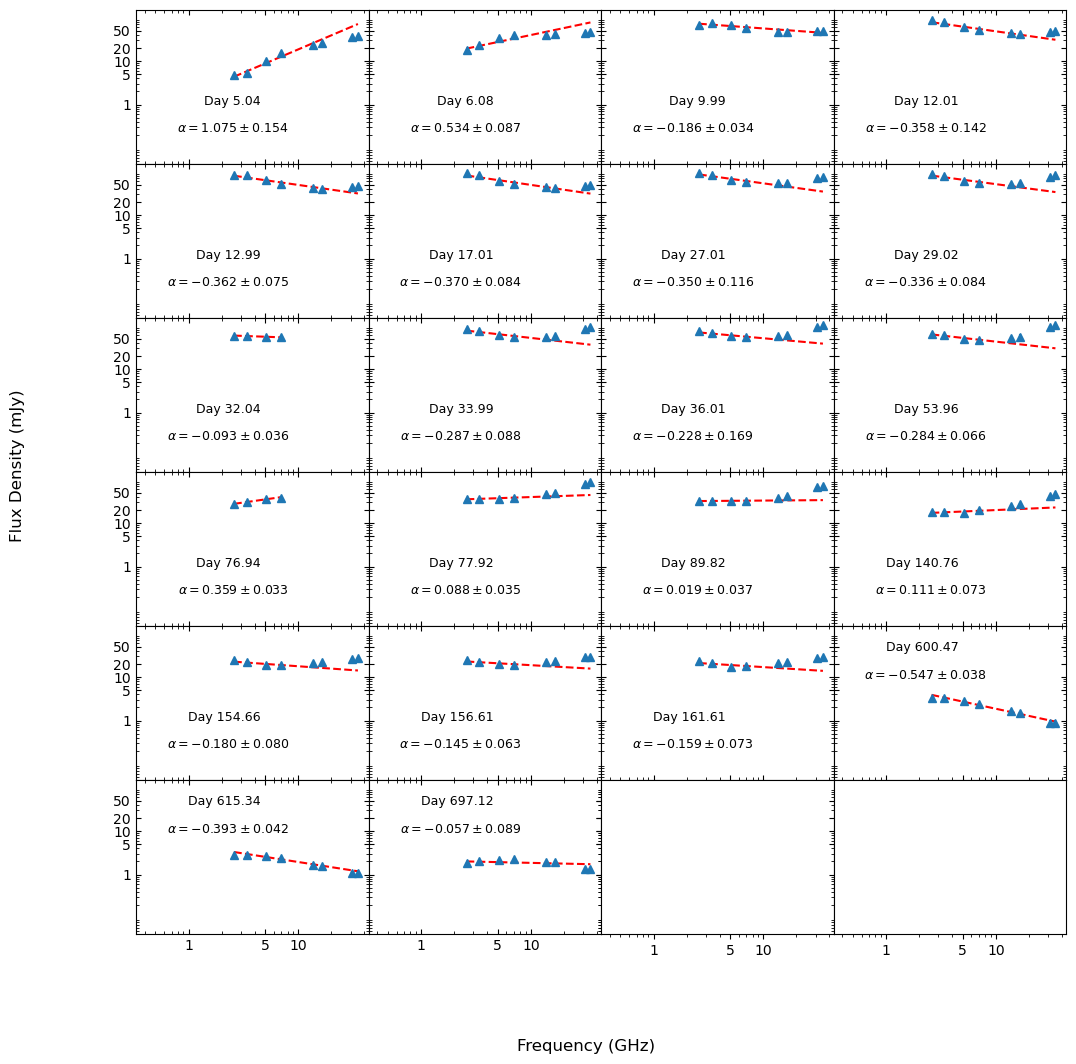

In [197]:
fig, ax = plt.subplots(6, 4, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#first r0w
mask = df1['Flux Density (mJy)'] > 3 * df1['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,0].errorbar(df1['Freq (GHz)'][mask], df1['Flux Density (mJy)'][mask], yerr=yerr1, fmt='^')
    ax[0,0].set_xscale('log')
    ax[0,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,0].set_yscale('log')
    ax[0,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,0].annotate('Day 5.04', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,0].plot(df1['Freq (GHz)'][mask], fit_model_weights1(df1['Freq (GHz)'][mask]), 'r--')
    ax[0,0].annotate('${\u03B1 = 1.075 \\pm 0.154}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df2['Flux Density (mJy)'] > 3 * df2['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,1].errorbar(df2['Freq (GHz)'][mask], df2['Flux Density (mJy)'][mask], yerr=yerr2, fmt='^')
    ax[0,1].set_xscale('log')
    ax[0,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,1].set_yscale('log')
    ax[0,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,1].annotate('Day 6.08', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,1].plot(df2['Freq (GHz)'][mask], fit_model_weights2(df2['Freq (GHz)'][mask]), 'r--')
    ax[0,1].annotate('${\u03B1 = 0.534 \\pm 0.087}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df3['Flux Density (mJy)'] > 3 * df3['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,2].errorbar(df3['Freq (GHz)'][mask], df3['Flux Density (mJy)'][mask], yerr=yerr3, fmt='^')
    ax[0,2].set_xscale('log')
    ax[0,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,2].set_yscale('log')
    ax[0,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,2].annotate('Day 9.99', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,2].plot(df3['Freq (GHz)'][mask], fit_model_weights3(df3['Freq (GHz)'][mask]), 'r--')
    ax[0,2].annotate('${\u03B1 = -0.186 \\pm 0.034}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df4['Flux Density (mJy)'] > 3 * df4['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[0,3].errorbar(df4['Freq (GHz)'][mask], df4['Flux Density (mJy)'][mask], yerr=yerr4, fmt='^')
    ax[0,3].set_xscale('log')
    ax[0,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[0,3].set_yscale('log')
    ax[0,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[0,3].annotate('Day 12.01', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[0,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[0,3].plot(df4['Freq (GHz)'][mask], fit_model_weights4(df4['Freq (GHz)'][mask]), 'r--')
    ax[0,3].annotate('${\u03B1 = -0.358 \\pm 0.142}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#second row
mask = df5['Flux Density (mJy)'] > 3 * df5['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,0].errorbar(df5['Freq (GHz)'][mask], df5['Flux Density (mJy)'][mask], yerr=yerr5, fmt='^')
    ax[1,0].set_xscale('log')
    ax[1,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,0].set_yscale('log')
    ax[1,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,0].annotate('Day 12.99', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,0].plot(df5['Freq (GHz)'][mask], fit_model_weights5(df5['Freq (GHz)'][mask]), 'r--')
    ax[1,0].annotate('${\u03B1 = -0.362 \\pm 0.075}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df6['Flux Density (mJy)'] > 3 * df6['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,1].errorbar(df6['Freq (GHz)'][mask], df6['Flux Density (mJy)'][mask], yerr=yerr6, fmt='^')
    ax[1,1].set_xscale('log')
    ax[1,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,1].set_yscale('log')
    ax[1,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,1].annotate('Day 17.01', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,1].plot(df6['Freq (GHz)'][mask], fit_model_weights6(df6['Freq (GHz)'][mask]), 'r--')
    ax[1,1].annotate('${\u03B1 = -0.370 \\pm 0.084}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df7['Flux Density (mJy)'] > 3 * df7['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,2].errorbar(df7['Freq (GHz)'][mask], df7['Flux Density (mJy)'][mask], yerr=yerr7, fmt='^')
    ax[1,2].set_xscale('log')
    ax[1,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,2].set_yscale('log')
    ax[1,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,2].annotate('Day 27.01', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,2].plot(df7['Freq (GHz)'][mask], fit_model_weights7(df7['Freq (GHz)'][mask]), 'r--')
    ax[1,2].annotate('${\u03B1 = -0.350 \\pm 0.116}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df8['Flux Density (mJy)'] > 3 * df8['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,3].errorbar(df8['Freq (GHz)'][mask], df8['Flux Density (mJy)'][mask], yerr=yerr8, fmt='^')
    ax[1,3].set_xscale('log')
    ax[1,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,3].set_yscale('log')
    ax[1,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,3].annotate('Day 29.02', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,3].plot(df8['Freq (GHz)'][mask], fit_model_weights8(df8['Freq (GHz)'][mask]), 'r--')
    ax[1,3].annotate('${\u03B1 = -0.336 \\pm 0.084}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#third row
mask = df9['Flux Density (mJy)'] > 3 * df9['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,0].errorbar(df9['Freq (GHz)'][mask], df9['Flux Density (mJy)'][mask], yerr=yerr9, fmt='^')
    ax[2,0].set_xscale('log')
    ax[2,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,0].set_yscale('log')
    ax[2,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,0].annotate('Day 32.04', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,0].plot(df9['Freq (GHz)'][mask], fit_model_weights9(df9['Freq (GHz)'][mask]), 'r--')
    ax[2,0].annotate('${\u03B1 = -0.093 \\pm 0.036}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df10['Flux Density (mJy)'] > 3 * df10['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,1].errorbar(df10['Freq (GHz)'][mask], df10['Flux Density (mJy)'][mask], yerr=yerr10, fmt='^')
    ax[2,1].set_xscale('log')
    ax[2,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,1].set_yscale('log')
    ax[2,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,1].annotate('Day 33.99', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,1].plot(df10['Freq (GHz)'][mask], fit_model_weights10(df10['Freq (GHz)'][mask]), 'r--')
    ax[2,1].annotate('${\u03B1 = -0.287 \\pm 0.088}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df11['Flux Density (mJy)'] > 3 * df11['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,2].errorbar(df11['Freq (GHz)'][mask], df11['Flux Density (mJy)'][mask], yerr=yerr11, fmt='^')
    ax[2,2].set_xscale('log')
    ax[2,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,2].set_yscale('log')
    ax[2,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,2].annotate('Day 36.01', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,2].plot(df11['Freq (GHz)'][mask], fit_model_weights11(df11['Freq (GHz)'][mask]), 'r--')
    ax[2,2].annotate('${\u03B1 = -0.228 \\pm 0.169}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df12['Flux Density (mJy)'] > 3 * df12['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,3].errorbar(df12['Freq (GHz)'][mask], df12['Flux Density (mJy)'][mask], yerr=yerr12, fmt='^')
    ax[2,3].set_xscale('log')
    ax[2,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,3].set_yscale('log')
    ax[2,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,3].annotate('Day 53.96', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,3].plot(df12['Freq (GHz)'][mask], fit_model_weights12(df12['Freq (GHz)'][mask]), 'r--')
    ax[2,3].annotate('${\u03B1 = -0.284 \\pm 0.066}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

#fourth fow
mask = df13['Flux Density (mJy)'] > 3 * df13['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,0].errorbar(df13['Freq (GHz)'][mask], df13['Flux Density (mJy)'][mask], yerr=yerr13, fmt='^')
    ax[3,0].set_xscale('log')
    ax[3,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,0].set_yscale('log')
    ax[3,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,0].annotate('Day 76.94', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,0].plot(df13['Freq (GHz)'][mask], fit_model_weights13(df13['Freq (GHz)'][mask]), 'r--')
    ax[3,0].annotate('${\u03B1 = 0.359 \\pm 0.033}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df14['Flux Density (mJy)'] > 3 * df14['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,1].errorbar(df14['Freq (GHz)'][mask], df14['Flux Density (mJy)'][mask], yerr=yerr14, fmt='^')
    ax[3,1].set_xscale('log')
    ax[3,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,1].set_yscale('log')
    ax[3,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,1].annotate('Day 77.92', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,1].plot(df14['Freq (GHz)'][mask], fit_model_weights14(df14['Freq (GHz)'][mask]), 'r--')
    ax[3,1].annotate('${\u03B1 = 0.088 \\pm 0.035}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df15['Flux Density (mJy)'] > 3 * df15['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,2].errorbar(df15['Freq (GHz)'][mask], df15['Flux Density (mJy)'][mask], yerr=yerr15, fmt='^')
    ax[3,2].set_xscale('log')
    ax[3,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,2].set_yscale('log')
    ax[3,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,2].annotate('Day 89.82', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,2].plot(df15['Freq (GHz)'][mask], fit_model_weights15(df15['Freq (GHz)'][mask]), 'r--')
    ax[3,2].annotate('${\u03B1 = 0.019 \\pm 0.037}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df16['Flux Density (mJy)'] > 3 * df16['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[3,3].errorbar(df16['Freq (GHz)'][mask], df16['Flux Density (mJy)'][mask], yerr=yerr16, fmt='^')
    ax[3,3].set_xscale('log')
    ax[3,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[3,3].set_yscale('log')
    ax[3,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[3,3].annotate('Day 140.76', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[3,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[3,3].plot(df16['Freq (GHz)'][mask], fit_model_weights16(df16['Freq (GHz)'][mask]), 'r--')
    ax[3,3].annotate('${\u03B1 = 0.111 \\pm 0.073}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

#fifth row
mask = df17['Flux Density (mJy)'] > 3 * df17['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,0].errorbar(df17['Freq (GHz)'][mask], df17['Flux Density (mJy)'][mask], yerr=yerr17, fmt='^')
    ax[4,0].set_xscale('log')
    ax[4,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,0].set_yscale('log')
    ax[4,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,0].annotate('Day 154.66', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,0].plot(df17['Freq (GHz)'][mask], fit_model_weights17(df17['Freq (GHz)'][mask]), 'r--')
    ax[4,0].annotate('${\u03B1 = -0.180 \\pm 0.080}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df18['Flux Density (mJy)'] > 3 * df18['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,1].errorbar(df18['Freq (GHz)'][mask], df18['Flux Density (mJy)'][mask], yerr=yerr18, fmt='^')
    ax[4,1].set_xscale('log')
    ax[4,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,1].set_yscale('log')
    ax[4,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,1].annotate('Day 156.61', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,1].plot(df18['Freq (GHz)'][mask], fit_model_weights18(df18['Freq (GHz)'][mask]), 'r--')
    ax[4,1].annotate('${\u03B1 = -0.145 \\pm 0.063}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df19['Flux Density (mJy)'] > 3 * df19['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,2].errorbar(df19['Freq (GHz)'][mask], df19['Flux Density (mJy)'][mask], yerr=yerr19, fmt='^')
    ax[4,2].set_xscale('log')
    ax[4,2].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,2].set_yscale('log')
    ax[4,2].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,2].annotate('Day 161.61', xy=(90, 50), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,2].plot(df19['Freq (GHz)'][mask], fit_model_weights19(df19['Freq (GHz)'][mask]), 'r--')
    ax[4,2].annotate('${\u03B1 = -0.159 \\pm 0.073}$', xy=(110, 30), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df20['Flux Density (mJy)'] > 3 * df20['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[4,3].errorbar(df20['Freq (GHz)'][mask], df20['Flux Density (mJy)'][mask], yerr=yerr20, fmt='^')
    ax[4,3].set_xscale('log')
    ax[4,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[4,3].set_yscale('log')
    ax[4,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[4,3].annotate('Day 600.47', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[4,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[4,3].plot(df20['Freq (GHz)'][mask], fit_model_weights20(df20['Freq (GHz)'][mask]), 'r--')
    ax[4,3].annotate('${\u03B1 = -0.547 \\pm 0.038}$', xy=(110, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

#sixth row
mask = df21['Flux Density (mJy)'] > 3 * df21['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,0].errorbar(df21['Freq (GHz)'][mask], df21['Flux Density (mJy)'][mask], yerr=yerr21, fmt='^')
    ax[5,0].set_xscale('log')
    ax[5,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[5,0].set_yscale('log')
    ax[5,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[5,0].annotate('Day 615.34', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[5,0].plot(df21['Freq (GHz)'][mask], fit_model_weights21(df21['Freq (GHz)'][mask]), 'r--')
    ax[5,0].annotate('${\u03B1 = -0.393 \\pm 0.042}$', xy=(110, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

mask = df22['Flux Density (mJy)'] > 3 * df22['Uncertainty (mJy)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[5,1].errorbar(df22['Freq (GHz)'][mask], df22['Flux Density (mJy)'][mask], yerr=yerr22, fmt='^')
    ax[5,1].set_xscale('log')
    ax[5,1].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[5,1].set_yscale('log')
    ax[5,1].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[5,1].annotate('Day 697.12', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[5,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[5,1].plot(df22['Freq (GHz)'][mask], fit_model_weights22(df22['Freq (GHz)'][mask]), 'r--')
    ax[5,1].annotate('${\u03B1 = -0.057 \\pm 0.089}$', xy=(110, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))



fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();